# IMPORT MODULE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)}) 
from scipy.stats import shapiro 
from statsmodels.graphics.gofplots import qqplot

# IMPORT DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

pengangguran_20 = pd.read_excel('/content/drive/MyDrive/Tubes Statin/Data/FIX/Tingkat Pengangguran Terbuka Menurut Provinsi tahun 2020.xlsx')
pengangguran_21 = pd.read_excel('/content/drive/MyDrive/Tubes Statin/Data/FIX/Tingkat Pengangguran Terbuka Menurut Provinsi tahun 2021.xlsx')
covid_20 = pd.read_excel('/content/drive/MyDrive/Tubes Statin/Data/FIX/Covid-19 Per Provinsi Indonesia 2020 FIX BANGET.xlsx')
covid_21 = pd.read_excel('/content/drive/MyDrive/Tubes Statin/Data/FIX/Covid-19 Per Provinsi Indonesia 2021 FIX BANGET.xlsx')
Sekolah = pd.read_excel('/content/drive/MyDrive/Tubes Statin/Data/FIX/Guru dan siswa FIX.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATA View

--- 
**pengangguran 2020**

In [ ]:
pengangguran_20.head()

Provinsi  Februari  Agustus
0           ACEH      5.40     6.59
1           BALI      1.25     5.63
2         BANTEN      7.99    10.64
3       BENGKULU      3.08     4.07
4  DI YOGYAKARTA      3.38     4.57

--- 
**pengangguran 2021**

In [ ]:
pengangguran_21.head()

Provinsi  Februari  Agustus
0           ACEH      6.30     6.30
1           BALI      5.42     5.37
2         BANTEN      9.01     8.98
3       BENGKULU      3.72     3.65
4  DI YOGYAKARTA      4.28     4.56

--- 
**Covid 2020**

In [ ]:
covid_20.head()

Provinsi  Januari  Februari  Maret  April    Mei   Juni    Juli  \
0           Aceh      0.0       0.0    4.0    6.0   10.0   60.0   335.0   
1           Bali      0.0       0.0   19.0  202.0  243.0  885.0  1914.0   
2         Banten      0.0       0.0  115.0  280.0  457.0  370.0   353.0   
3       Bengkulu      0.0       0.0    1.0   11.0   79.0   33.0    92.0   
4  DI Yogyakarta      0.0       0.0   27.0   72.0  141.0   64.0   363.0   

   Agustus  September  Oktober  November  Desember  
0   1218.0     2921.0   2851.0     887.0     454.0  
1   1800.0     3671.0   2886.0    2115.0    3714.0  
2   1068.0     2740.0   3847.0    3571.0    5109.0  
3    126.0      350.0    388.0     742.0    1780.0  
4    751.0     1218.0   1192.0    2128.0    6192.0

--- 
**Covid 2021**

In [ ]:
covid_21.head()

Provinsi  Januari  Februari   Maret   April     Mei     Juni     Juli  \
0           Aceh    482.0     313.0   351.0  1153.0  3972.0   4229.0   3799.0   
1           Bali   8559.0    8063.0  5469.0  4987.0  2588.0   2958.0  26102.0   
2         Banten   8034.0    3272.0  8283.0  9584.0  2133.0   7648.0  55608.0   
3       Bengkulu    976.0     354.0   528.0  1321.0  1292.0   2057.0   7686.0   
4  DI Yogyakarta   9670.0    5998.0  5649.0  6044.0  5230.0  15713.0  57374.0   

   Agustus  September  Oktober  November  Desember  
0   9890.0        NaN      NaN       NaN       NaN  
1  30515.0        NaN      NaN       NaN       NaN  
2  16284.0        NaN      NaN       NaN       NaN  
3   4653.0        NaN      NaN       NaN       NaN  
4  32085.0        NaN      NaN       NaN       NaN

--- 
**sekolah**

In [ ]:
Sekolah.head()

Provinsi    Guru    Siswa
0           ACEH  120419   932683
1           BALI   64291   820544
2         BANTEN  135593  2148778
3       BENGKULU   39392   402717
4  DI YOGYAKARTA   67309   668716

# INFO Data

--- 
**pengangguran 2020**

In [ ]:
pengangguran_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  34 non-null     object 
 1   Februari  34 non-null     float64
 2   Agustus   34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


--- 
**pengangguran 2021**

In [ ]:
pengangguran_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  34 non-null     object 
 1   Februari  34 non-null     float64
 2   Agustus   34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


--- 
**Covid 2020**

In [ ]:
covid_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Provinsi   34 non-null     object 
 1   Januari    34 non-null     float64
 2   Februari   34 non-null     float64
 3   Maret      34 non-null     float64
 4   April      34 non-null     float64
 5   Mei        34 non-null     float64
 6   Juni       34 non-null     float64
 7   Juli       34 non-null     float64
 8   Agustus    34 non-null     float64
 9   September  34 non-null     float64
 10  Oktober    34 non-null     float64
 11  November   34 non-null     float64
 12  Desember   34 non-null     float64
dtypes: float64(12), object(1)
memory usage: 3.6+ KB


--- 
**Covid 2021**

In [ ]:
covid_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Provinsi   34 non-null     object 
 1   Januari    34 non-null     float64
 2   Februari   34 non-null     float64
 3   Maret      34 non-null     float64
 4   April      34 non-null     float64
 5   Mei        34 non-null     float64
 6   Juni       34 non-null     float64
 7   Juli       34 non-null     float64
 8   Agustus    34 non-null     float64
 9   September  0 non-null      float64
 10  Oktober    0 non-null      float64
 11  November   0 non-null      float64
 12  Desember   0 non-null      float64
dtypes: float64(12), object(1)
memory usage: 3.6+ KB


--- 
**Sekolah**

In [ ]:
Sekolah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provinsi  34 non-null     object
 1   Guru      34 non-null     int64 
 2   Siswa     34 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 944.0+ bytes


# Menentukan Sampling


In [ ]:
populasi = 34
error = 0.05
n = populasi/(1+(populasi*(error**2)))
print(f"sample dengan error 5% adalah = {round(n)} Provinsi")

sample dengan error 5% adalah = 31 Provinsi


# Line Chart Covid

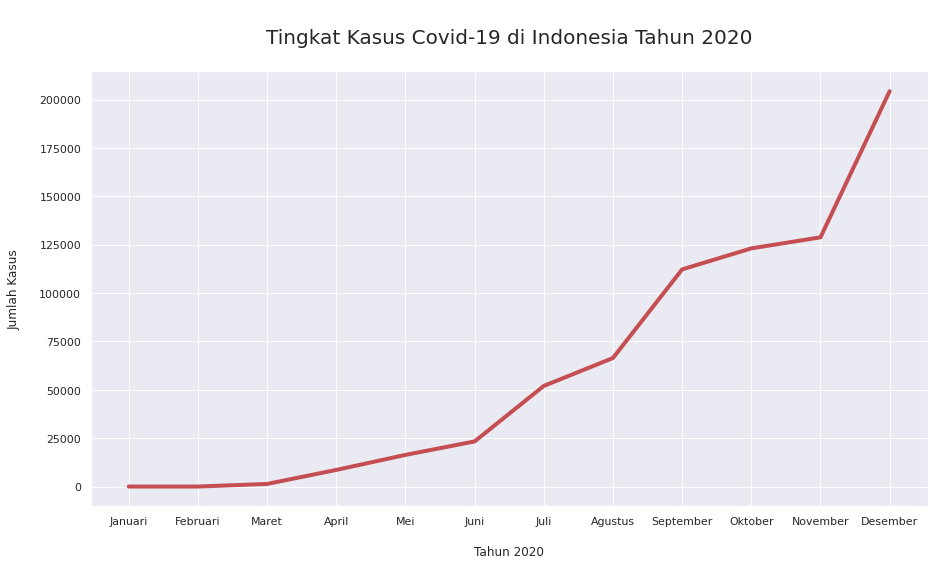

In [ ]:
bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
         'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
data = [covid_20.Januari.sum(), covid_20.Februari.sum(), covid_20.Maret.sum(),covid_20.April.sum(),covid_20.Mei.sum(),covid_20.Juni.sum(),
        covid_20.Juli.sum(),covid_20.Agustus.sum(), covid_20.September.sum(), covid_20.Oktober.sum(), covid_20.November.sum(), covid_20.Desember.sum()]


plt.figure(figsize=(15,8))
plt.plot(bulan, data, lw=4, color='r')
plt.ylabel('Jumlah Kasus\n')
plt.xlabel('\nTahun 2020\n')
plt.title('\nTingkat Kasus Covid-19 di Indonesia Tahun 2020\n', fontsize=20)
plt.show()

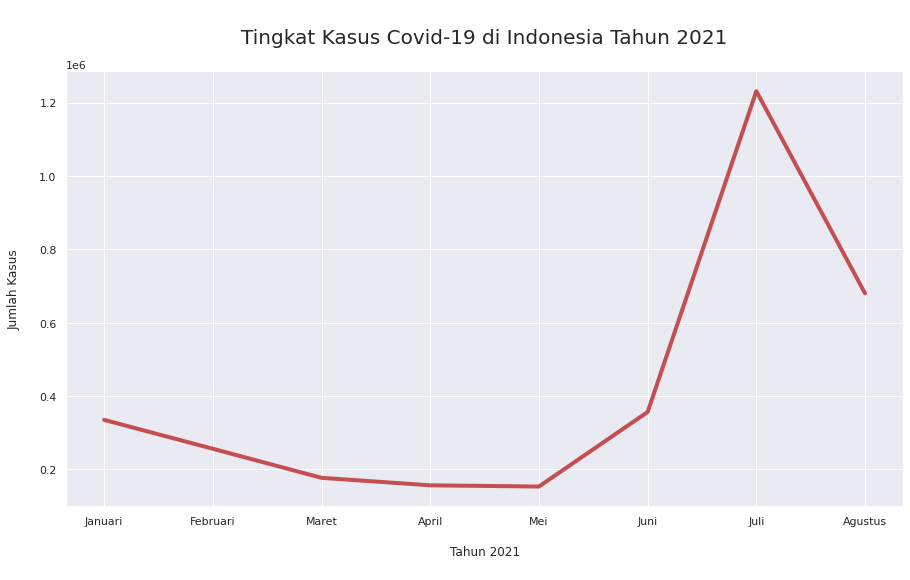

In [ ]:
bulan1 = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
         'Juli', 'Agustus']
data1 = [covid_21.Januari.sum(), covid_21.Februari.sum(), covid_21.Maret.sum(),covid_21.April.sum(),covid_21.Mei.sum(),covid_21.Juni.sum(),
        covid_21.Juli.sum(),covid_21.Agustus.sum(),]


plt.figure(figsize=(15,8))
plt.plot(bulan1, data1, lw=4, color='r')
plt.ylabel('Jumlah Kasus\n')
plt.xlabel('\nTahun 2021\n')
plt.title('\nTingkat Kasus Covid-19 di Indonesia Tahun 2021\n', fontsize=20)
plt.show()

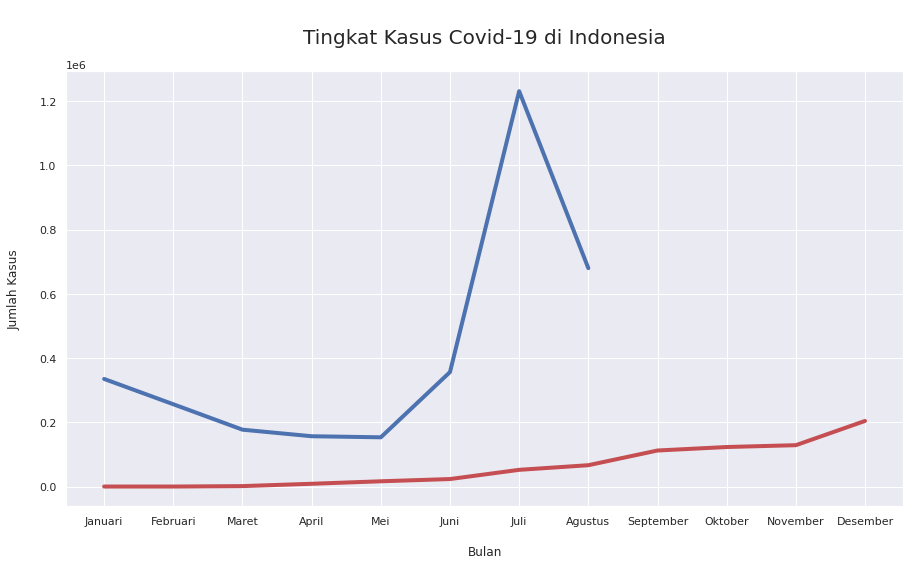

In [ ]:
bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
         'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
data = [covid_20.Januari.sum(), covid_20.Februari.sum(), covid_20.Maret.sum(),covid_20.April.sum(),covid_20.Mei.sum(),covid_20.Juni.sum(),
        covid_20.Juli.sum(),covid_20.Agustus.sum(), covid_20.September.sum(), covid_20.Oktober.sum(), covid_20.November.sum(), covid_20.Desember.sum()]


plt.figure(figsize=(15,8))
plt.plot(bulan1, data1, lw=4, color='b')
plt.plot(bulan, data, lw=4, color='r')
plt.ylabel('Jumlah Kasus\n')
plt.xlabel('\nBulan\n')
plt.title('\nTingkat Kasus Covid-19 di Indonesia\n', fontsize=20)
plt.show()

# Preprocessing Data

**Rata" Data**

In [ ]:
covid_Februari_20 = round(covid_20.Januari + covid_20.Februari)
covid_Agustus_20 = round((covid_20.Maret + covid_20.April + covid_20.Mei + covid_20.Juni + covid_20.Juli + covid_20.Agustus)/6)
covid_Februari_21 = round((covid_20.September + covid_20.Oktober + covid_20.November + covid_20.Desember + covid_21.Januari + covid_21.Februari)/6)
covid_Agustus_21 = round((covid_21.Maret + covid_21.April + covid_21.Mei + covid_21.Juni + covid_21.Juli + covid_21.Agustus)/6) 

**New DataFrame**

In [ ]:
Provinsi = list(x for x in covid_20['Provinsi'])

covid_20_Feb = list(x for x in covid_Februari_20)
covid_20_Agus = list(x for x in covid_Agustus_20)
covid_21_Feb = list(x for x in covid_Februari_21)
covid_21_Agus = list(x for x in covid_Agustus_21)
  
pengangguran_20_Feb = list(x for x in pengangguran_20['Februari'])
pengangguran_20_Agus = list(x for x in pengangguran_20['Agustus'])
pengangguran_21_Feb = list(x for x in pengangguran_21['Februari'])
pengangguran_21_Agus = list(x for x in pengangguran_21['Agustus'])

Guru = list(x for x in Sekolah['Guru'])
Siswa = list(x for x in Sekolah['Siswa'])   

In [ ]:
df = pd.DataFrame(Provinsi, columns= ['Provinsi'])

# Covid
df['covid20_Februari (orang)'] = covid_20_Feb
df['covid20_Agustus (orang)'] = covid_20_Agus
df['covid21_Februari (orang)'] = covid_21_Feb
df['covid21_Agustus (orang)'] = covid_21_Agus

# Pengangguran
df['pengangguran20_Februari (persen)'] = pengangguran_20_Feb
df['pengangguran20_Agustus (persen)'] = pengangguran_20_Agus
df['pengangguran21_Februari (persen)'] = pengangguran_21_Feb
df['pengangguran21_Agustus (persen)'] = pengangguran_21_Agus

# Sekolah
df['Guru (orang)'] = Guru
df['Siswa (orang)'] = Siswa 

# View And Info

**banyak provinsi**

In [ ]:
print(f"Banyak Provinsi : {len(df['Provinsi'])-1}")

Banyak Provinsi : 33


In [ ]:
df['guru:siswa'] = df['Siswa (orang)'] / df['Guru (orang)']
dfdrop = df.drop(['covid20_Februari (orang)', 'Guru (orang)','Siswa (orang)'], axis=1, inplace=False)
dfdrop.head(15) 

Provinsi  covid20_Agustus (orang)  covid21_Februari (orang)  \
0                 Aceh                    272.0                    1318.0   
1                 Bali                    844.0                    4835.0   
2               Banten                    440.0                    4429.0   
3             Bengkulu                     57.0                     765.0   
4        DI Yogyakarta                    236.0                    4400.0   
5          DKI Jakarta                   6535.0                   49941.0   
6            Gorontalo                    333.0                     459.0   
7                Jambi                     49.0                     864.0   
8           Jawa Barat                   1768.0                   33358.0   
9          Jawa Tengah                   2282.0                   23177.0   
10          Jawa Timur                   5310.0                   15987.0   
11    Kalimantan Barat                    100.0                     666.0   
12  Kalimantan Selatan                   1295.0                    2258.0   
13   kalimantan Tengah                    406.0                    1884.0   
14    kalimantan Timur                    698.0                    8524.0   

    covid21_Agustus (orang)  pengangguran20_Februari (persen)  \
0                    3899.0                              5.40   
1                   12103.0                              1.25   
2                   16590.0                              7.99   
3                    2923.0                              3.08   
4                   20349.0                              3.38   
5                   85141.0                              5.15   
6                    1070.0                              3.29   
7                    3778.0                              4.26   
8                   79952.0                              7.71   
9                   52716.0                              4.20   
10                  42299.0                              3.60   
11                   5226.0                              4.47   
12                   7346.0                              3.67   
13                   4918.0                              3.33   
14                  15884.0                              6.72   

    pengangguran20_Agustus (persen)  pengangguran21_Februari (persen)  \
0                              6.59                              6.30   
1                              5.63                              5.42   
2                             10.64                              9.01   
3                              4.07                              3.72   
4                              4.57                              4.28   
5                             10.95                              8.51   
6                              4.28                              3.41   
7                              5.13                              4.76   
8                             10.46                              8.92   
9                              6.48                              5.96   
10                             5.84                              5.17   
11                             5.81                              5.73   
12                             4.74                              4.33   
13                             4.58                              4.25   
14                             6.87                              6.81   

    pengangguran21_Agustus (persen)  guru:siswa  
0                              6.30    7.745314  
1                              5.37   12.762968  
2                              8.98   15.847264  
3                              3.65   10.223319  
4                              4.56    9.935016  
5                              8.50   14.344952  
6                              3.01   11.018848  
7                              5.09   10.368913  
8                              9.82   15.881916  
9                              5.95   12.687971  
10                   

In [ ]:
dfdrop.describe()

covid20_Agustus (orang)  covid21_Februari (orang)  \
count                34.000000                 34.000000   
mean                823.441176               5685.411765   
std                1417.872610              10425.016373   
min                  27.000000                354.000000   
25%                 108.250000               1123.500000   
50%                 320.500000               1871.500000   
75%                 705.500000               4421.750000   
max                6535.000000              49941.000000   

       covid21_Agustus (orang)  pengangguran20_Februari (persen)  \
count                34.000000                         34.000000   
mean              13505.676471                          4.462353   
std               20673.341677                          1.567849   
min                1056.000000                          1.250000   
25%                2895.250000                          3.335000   
50%                6158.000000                          4.230000   
75%               12068.000000                          5.385000   
max               85141.000000                          7.990000   

       pengangguran20_Agustus (persen)  pengangguran21_Februari (persen)  \
count                        34.000000                         34.000000   
mean                          6.033529                          5.504412   
std                           2.013129                          1.727330   
min                           3.320000                          3.280000   
25%                           4.580000                          4.257500   
50%                           5.570000                          5.115000   
75%                           6.852500                          6.270000   
max                          10.950000                         10.120000   

       pengangguran21_Agustus (persen)  guru:siswa  
count                        34.000000   34.000000  
mean                          5.492059   11.635344  
std                           1.818745    1.964570  
min                           3.010000    7.745314  
25%                           4.447500   10.327969  
50%                           5.060000   11.179292  
75%                           6.322500   12.762643  
max                           9.910000   16.120500

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Provinsi                          34 non-null     object 
 1   covid20_Februari (orang)          34 non-null     float64
 2   covid20_Agustus (orang)           34 non-null     float64
 3   covid21_Februari (orang)          34 non-null     float64
 4   covid21_Agustus (orang)           34 non-null     float64
 5   pengangguran20_Februari (persen)  34 non-null     float64
 6   pengangguran20_Agustus (persen)   34 non-null     float64
 7   pengangguran21_Februari (persen)  34 non-null     float64
 8   pengangguran21_Agustus (persen)   34 non-null     float64
 9   Guru (orang)                      34 non-null     int64  
 10  Siswa (orang)                     34 non-null     int64  
 11  guru:siswa                        34 non-null     float64
dtypes: float64

# Mencari Outlier

**Quartil**




In [ ]:
describe = df.describe()

In [ ]:
covid20_Agus = describe['covid20_Agustus (orang)'].unique()
Q1_covid20_Agus = covid20_Agus[4]
Q3_covid20_Agus = covid20_Agus[6] 

In [ ]:
covid21_Feb = describe['covid21_Februari (orang)'].unique()
Q1_covid21_Feb = covid21_Feb[4]
Q3_covid21_Feb = covid21_Feb[6]

In [ ]:
covid21_Agus = describe['covid21_Agustus (orang)'].unique()
Q1_covid21_Agus = covid21_Agus[4]
Q3_covid21_Agus = covid21_Agus[6]

In [ ]:
pengangguran20_Feb = describe['pengangguran20_Februari (persen)'].unique()
Q1_pengangguran20_Feb = pengangguran20_Feb[4]
Q3_pengangguran20_Feb = pengangguran20_Feb[6]

In [ ]:
pengangguran20_Agus = describe['pengangguran20_Agustus (persen)'].unique()
Q1_pengangguran20_Agus = pengangguran20_Agus[4]
Q3_pengangguran20_Agus = pengangguran20_Agus[6]

In [ ]:
pengangguran21_Feb = describe['pengangguran21_Februari (persen)'].unique()
Q1_pengangguran21_Feb = pengangguran21_Feb[4]
Q3_pengangguran21_Feb = pengangguran21_Feb[6]

In [ ]:
pengangguran21_Agus = describe['pengangguran21_Agustus (persen)'].unique()
Q1_pengangguran21_Agus = pengangguran21_Agus[4]
Q3_pengangguran21_Agus = pengangguran21_Agus[6]

In [ ]:
Guru = describe['Guru (orang)'].unique()
Q1_Guru = Guru[4]
Q3_Guru = Guru[6]

In [ ]:
Siswa = describe['Siswa (orang)'].unique()
Q1_Siswa = Siswa[4]
Q3_Siswa = Siswa[6]

In [ ]:
siswaVSguru = describe['guru:siswa'].unique()
Q1_siswaVSguru = siswaVSguru[4]
Q3_siswaVSguru = siswaVSguru[6]

**IQR (Jarak Interkuartil)**

In [ ]:
IQR_covid20_Agus = Q3_covid20_Agus - Q1_covid20_Agus
IQR_covid21_Feb = Q3_covid21_Feb - Q1_covid21_Feb
IQR_covid21_Agus = Q3_covid21_Agus - Q1_covid21_Agus

IQR_pengangguran20_Feb = Q3_pengangguran20_Feb - Q1_pengangguran20_Feb
IQR_pengangguran20_Agus = Q3_pengangguran20_Agus - Q1_pengangguran20_Agus
IQR_pengangguran21_Feb = Q3_pengangguran21_Feb - Q1_pengangguran21_Feb
IQR_pengangguran21_Agus = Q3_pengangguran21_Agus - Q1_pengangguran21_Agus

IQR_Guru = Q3_Guru - Q1_Guru
IQR_Siswa = Q3_Siswa - Q1_Siswa 

IQR_siswaVSguru = Q3_siswaVSguru - Q1_siswaVSguru 

**Limit Atas & Bawah**

In [ ]:
limit_atas_covid20_Agus = Q3_covid20_Agus + IQR_covid20_Agus * 1.5
limit_bawah_covid20_Agus = Q1_covid20_Agus - IQR_covid20_Agus * 1.5
limit_atas_covid21_Feb = Q3_covid21_Feb + IQR_covid21_Feb * 1.5
limit_bawah_covid21_Feb = Q1_covid21_Feb - IQR_covid21_Feb * 1.5
limit_atas_covid21_Agus = Q3_covid21_Agus + IQR_covid21_Agus * 1.5
limit_bawah_covid21_Agus = Q1_covid21_Agus - IQR_covid21_Agus * 1.5

limit_atas_pengangguran20_Feb = Q3_pengangguran20_Feb + IQR_pengangguran20_Feb * 1.5
limit_bawah_pengangguran20_Feb = Q1_pengangguran20_Feb - IQR_pengangguran20_Feb * 1.5
limit_atas_pengangguran20_Agus = Q3_pengangguran20_Agus + IQR_pengangguran20_Agus * 1.5
limit_bawah_pengangguran20_Agus = Q1_pengangguran20_Agus - IQR_pengangguran20_Agus * 1.5
limit_atas_pengangguran21_Feb = Q3_pengangguran21_Feb + IQR_pengangguran21_Feb * 1.5
limit_bawah_pengangguran21_Feb = Q1_pengangguran21_Feb - IQR_pengangguran21_Feb * 1.5
limit_atas_pengangguran21_Agus = Q3_pengangguran21_Agus + IQR_pengangguran21_Agus * 1.5
limit_bawah_pengangguran21_Agus = Q1_pengangguran21_Agus - IQR_pengangguran21_Agus * 1.5

limit_atas_Guru = Q3_Guru + IQR_Guru * 1.5
limit_bawah_Guru = Q1_Guru - IQR_Guru * 1.5

limit_atas_Siswa = Q3_Siswa + IQR_Siswa * 1.5
limit_bawah_Siswa = Q1_Siswa - IQR_Siswa * 1.5

limit_atas_siswaVSguru  = Q3_siswaVSguru  + IQR_siswaVSguru  * 1.5
limit_bawah_siswaVSguru  = Q1_siswaVSguru  - IQR_siswaVSguru  * 1.5

**Median**

In [ ]:
median_covid20_Agus = covid20_Agus[5]
median_covid21_Feb = covid21_Feb[5]
median_covid21_Agus = covid21_Agus[5]
median_pengangguran20_Feb = pengangguran20_Feb[5]
median_pengangguran20_Agus = pengangguran20_Agus[5]
median_pengangguran21_Feb = pengangguran21_Feb[5]
median_pengangguran21_Agus = pengangguran21_Agus[5]
median_Guru = Guru[5]
median_Siswa = Siswa[5]
median_siswaVSguru  = siswaVSguru[5]

**Mean**

In [ ]:
mean_covid20_Agus = covid20_Agus[1]
mean_covid21_Feb = covid21_Feb[1]
mean_covid21_Agus = covid21_Agus[1]
mean_pengangguran20_Feb = pengangguran20_Feb[1]
mean_pengangguran20_Agus = pengangguran20_Agus[1]
mean_pengangguran21_Feb = pengangguran21_Feb[1]
mean_pengangguran21_Agus = pengangguran21_Agus[1]
mean_Guru = Guru[1]
mean_Siswa = Siswa[1]
mean_siswaVSguru  = siswaVSguru [1]

# Visualisasi Boxplot 

---
**pengangguran20_Februari (persen)**

Text(0.5, 1.0, '\npengangguran20_Februari\n')

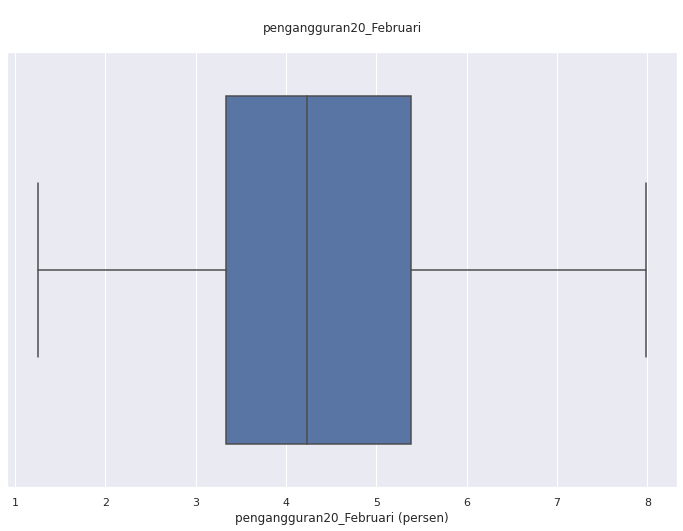

In [ ]:
sns.boxplot(x='pengangguran20_Februari (persen)',data=df)
plt.title("\npengangguran20_Februari\n")

**Tidak ada data diluar outlayer**


---
**pengangguran20_Agustus (persen)**

Text(0.5, 1.0, '\npengangguran20_Agustus\n')

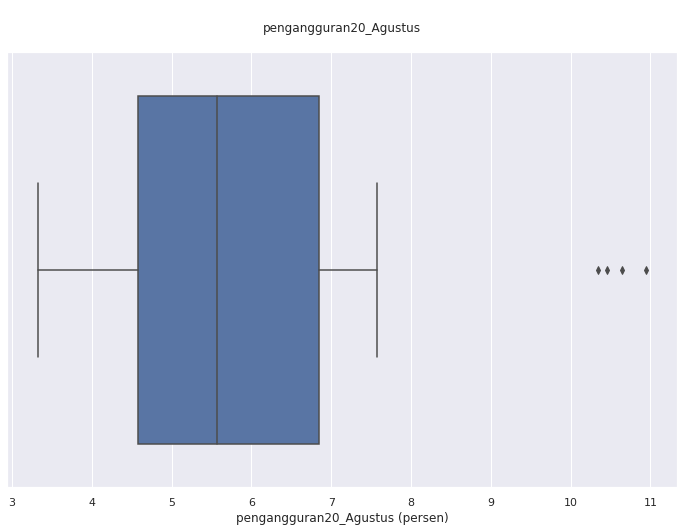

In [ ]:
sns.boxplot(x='pengangguran20_Agustus (persen)',data=df)
plt.title("\npengangguran20_Agustus\n")

diluar outlayer : Kep.riau, Jabar, Banten, DKI

---
**pengangguran21_Februari (persen)**

Text(0.5, 1.0, '\npengangguran21_Februari\n')

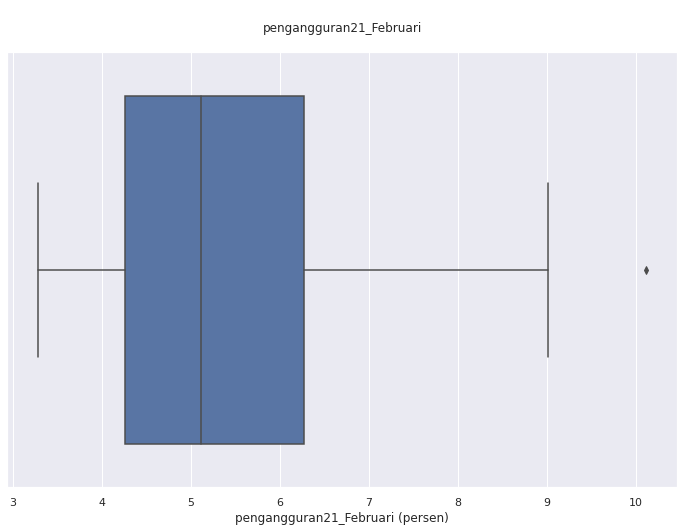

In [ ]:
sns.boxplot(x='pengangguran21_Februari (persen)',data=df)
plt.title("\npengangguran21_Februari\n")

diluar outlayer : kep.riau

---
**pengangguran21_Agustus (persen)**

Text(0.5, 1.0, '\npengangguran21_Agustus\n')

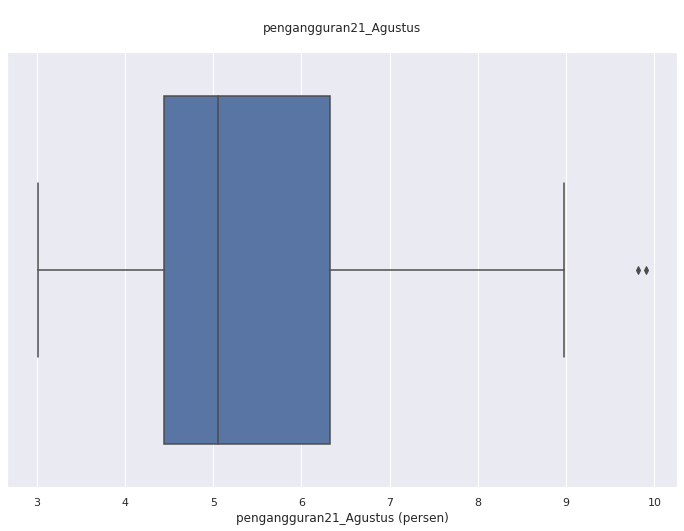

In [ ]:
sns.boxplot(x='pengangguran21_Agustus (persen)',data=df)
plt.title("\npengangguran21_Agustus\n")

diluar outlayer : jabar, kep.riau 



---
**covid20_Februari (orang)**

Text(0.5, 1.0, '\ncovid20_Februari\n')

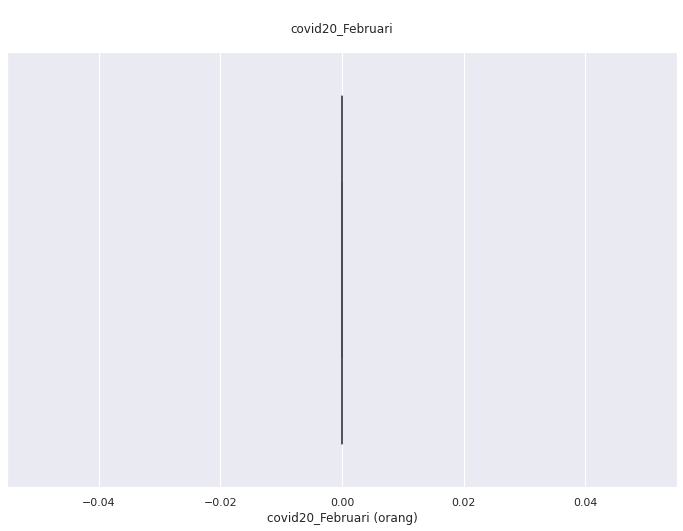

In [ ]:
sns.boxplot(x='covid20_Februari (orang)',data=df)
plt.title("\ncovid20_Februari\n")

**Tidak ada data / data 0**

---
**covid20_Agustus (orang)**

Text(0.5, 1.0, '\ncovid20_Agustus\n')

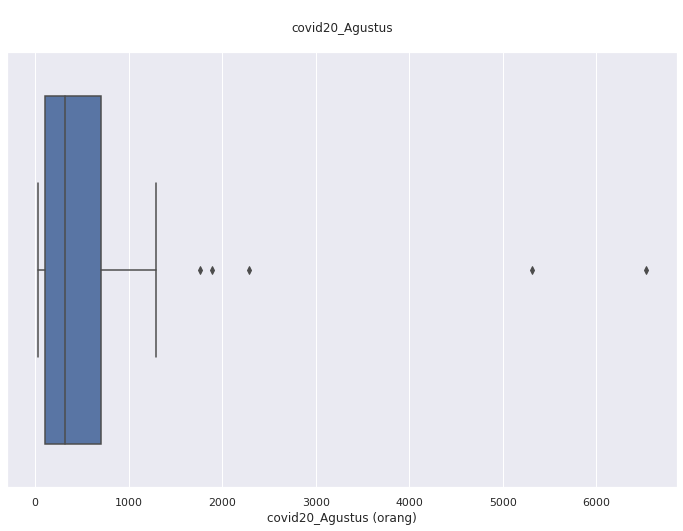

In [ ]:
sns.boxplot(x='covid20_Agustus (orang)',data=df)
plt.title("\ncovid20_Agustus\n")

diluar outlayer : Jabar, sulsel, Jateng, Jatim, DKI

---
**covid21_Februari (orang)**

Text(0.5, 1.0, '\ncovid21_Februari\n')

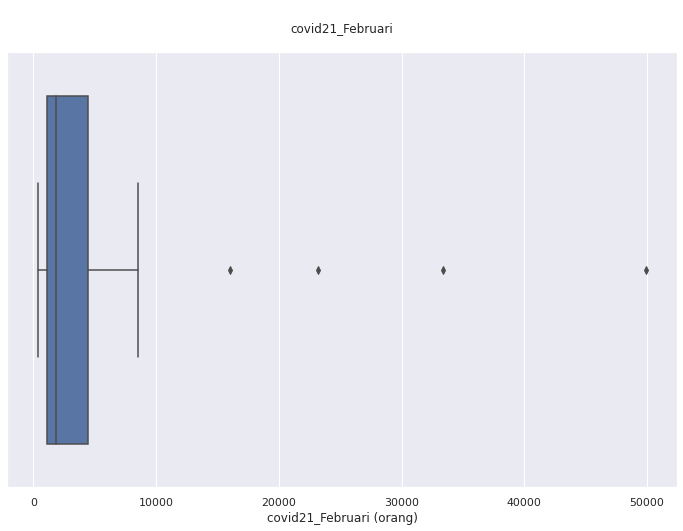

In [ ]:
sns.boxplot(x='covid21_Februari (orang)',data=df)
plt.title("\ncovid21_Februari\n")

diluar outlayer : Jatim, Jateng, Jabar, DKI

---
**covid21_Agustus (orang)**

Text(0.5, 1.0, '\ncovid21_Agustus\n')

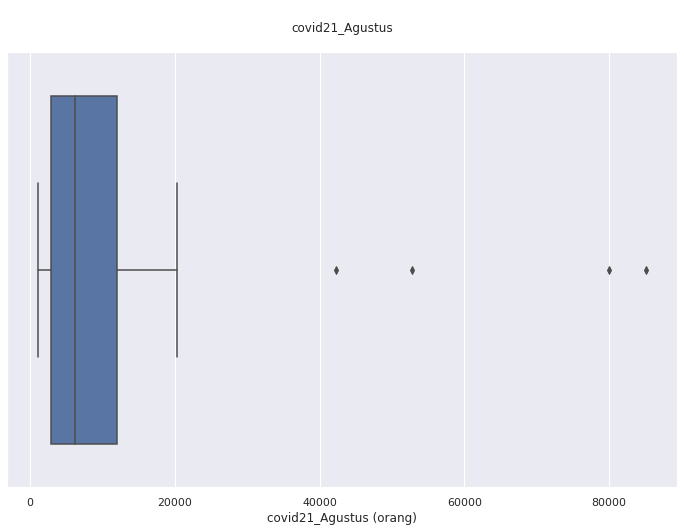

In [ ]:
sns.boxplot(x='covid21_Agustus (orang)',data=df)
plt.title("\ncovid21_Agustus\n")

diluar outlayer : Jatim, Jateng, Jabar, DKI

---
**Guru (orang)**

Text(0.5, 1.0, '\nGuru\n')

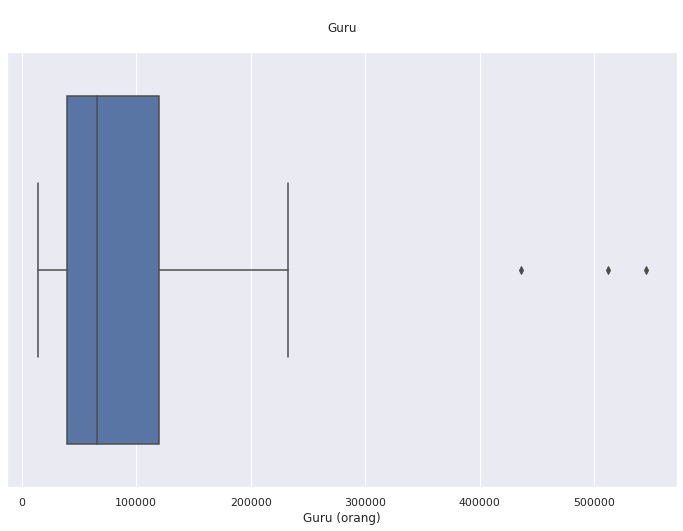

In [ ]:
sns.boxplot(x='Guru (orang)',data=df)
plt.title("\nGuru\n")

Data outlayer = Jawa Barat, Jawa Timur, jawa Tengah

---
**Siswa (orang)**

Text(0.5, 1.0, '\nSiswa\n')

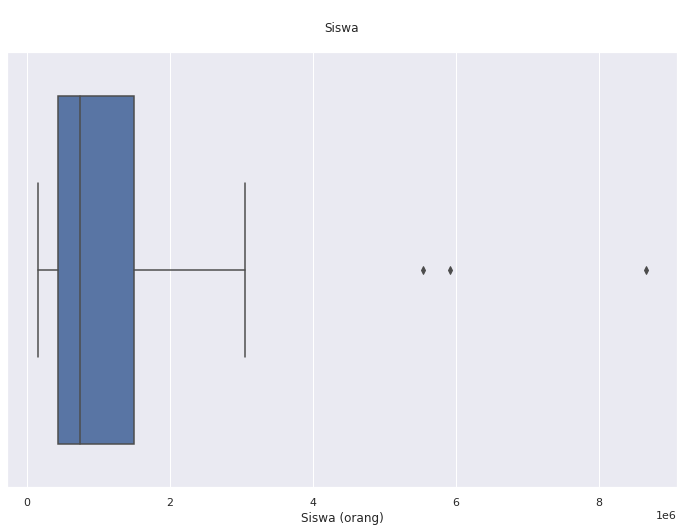

In [ ]:
sns.boxplot(x='Siswa (orang)',data=df)
plt.title("\nSiswa\n")

data ourlayer = Jabar, Jatim, Jateng

Text(0.5, 1.0, '\nguru:siswa\n')

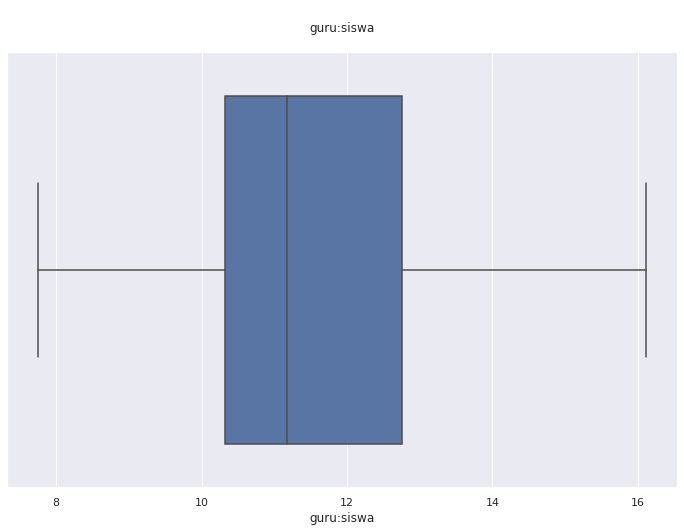

In [ ]:
sns.boxplot(x='guru:siswa',data=df)
plt.title("\nguru:siswa\n")

# Visualisasi

In [ ]:
pengangguran20_Februari_sort = df.sort_values(by='pengangguran20_Februari (persen)', ascending=True)
pengangguran20_Agustus_sort = df.sort_values(by='pengangguran20_Agustus (persen)', ascending=True)
pengangguran21_Februari_sort = df.sort_values(by='pengangguran21_Februari (persen)', ascending=True)
pengangguran21_Agustus_sort = df.sort_values(by='pengangguran21_Agustus (persen)', ascending=True)

provinsi_sort = df.sort_values(by='Provinsi', ascending=True)

covid20_Agustus_sort = df.sort_values(by='covid20_Agustus (orang)', ascending=True)
covid21_Februari_sort = df.sort_values(by='covid21_Februari (orang)', ascending=True)
covid21_Agustus_sort = df.sort_values(by='covid21_Agustus (orang)', ascending=True)

GuruVsSiswa_sort = df.sort_values(by='guru:siswa', ascending=True)

---
**pengangguran20_Februari (persen)**

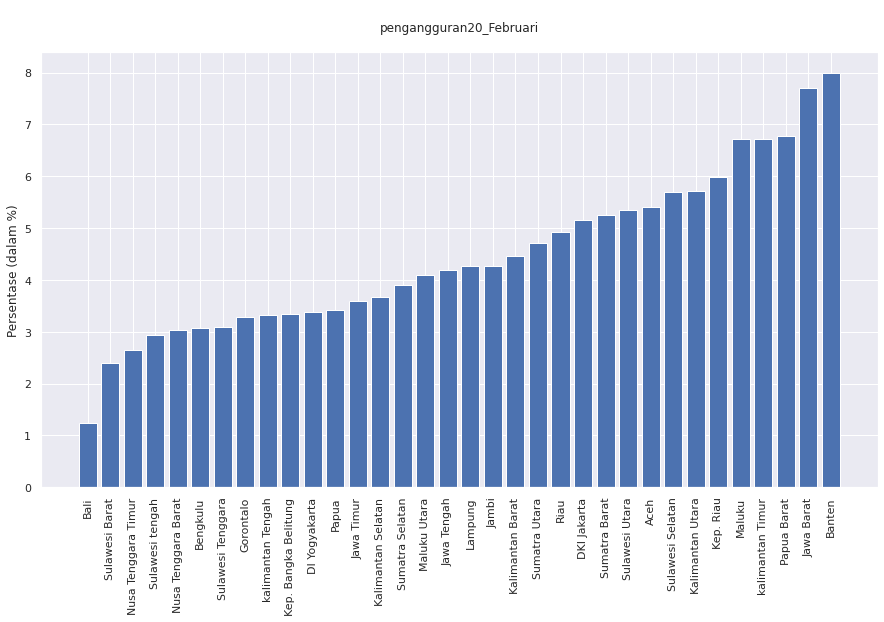

In [ ]:
x_coords = np.arange(len(df))

plt.figure(figsize=(15,8))
plt.bar(x_coords, pengangguran20_Februari_sort['pengangguran20_Februari (persen)'], tick_label=pengangguran20_Februari_sort['Provinsi'], color='b')
plt.xticks(rotation=90)
plt.ylabel('Persentase (dalam %)')
plt.title('\npengangguran20_Februari\n')
plt.show()

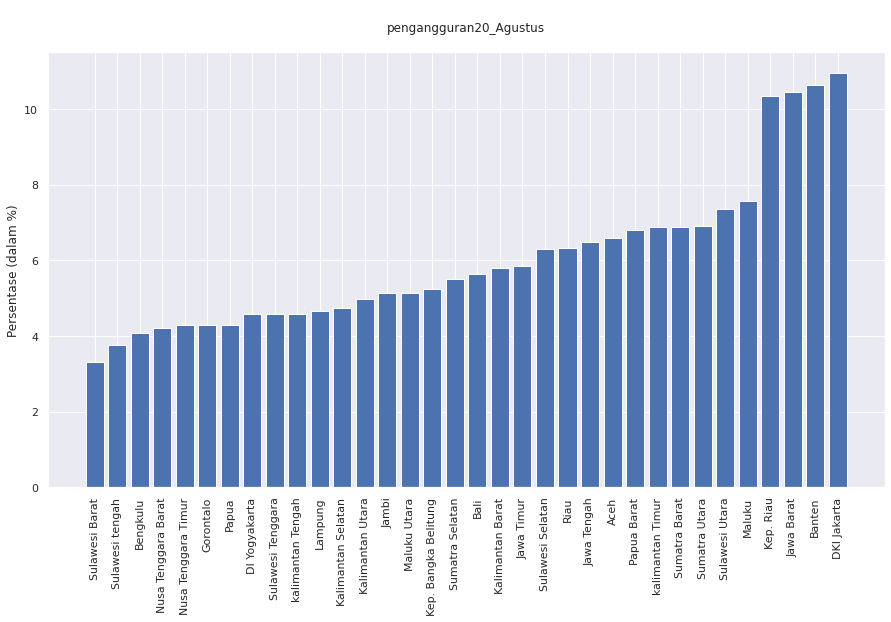

In [ ]:
x_coords = np.arange(len(df))

plt.figure(figsize=(15,8))
plt.bar(x_coords, pengangguran20_Agustus_sort['pengangguran20_Agustus (persen)'], tick_label=pengangguran20_Agustus_sort['Provinsi'], color='b')
plt.xticks(rotation=90)
plt.ylabel('Persentase (dalam %)')
plt.title('\npengangguran20_Agustus\n')
plt.show()

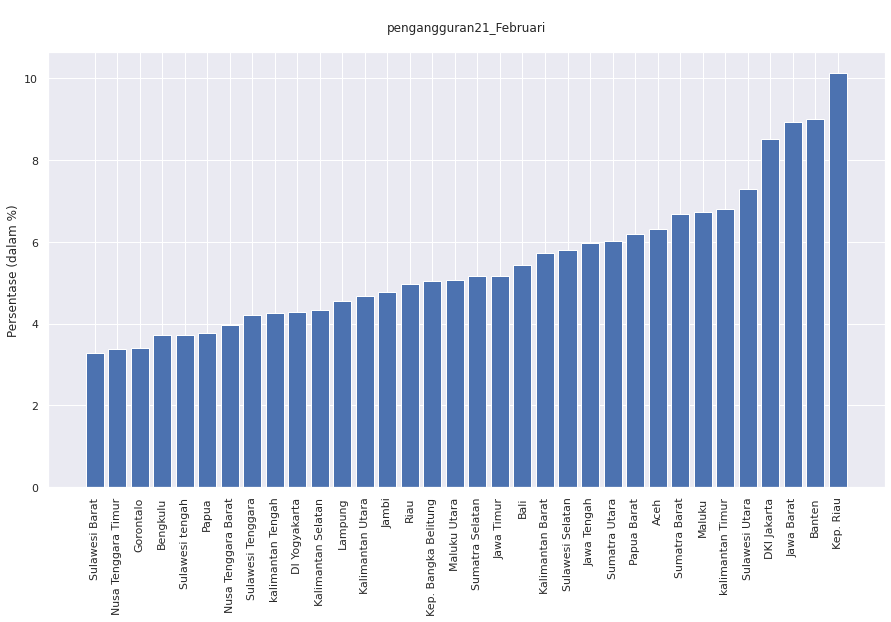

In [ ]:
x_coords = np.arange(len(df))

plt.figure(figsize=(15,8))
plt.bar(x_coords, pengangguran21_Februari_sort['pengangguran21_Februari (persen)'], tick_label=pengangguran21_Februari_sort['Provinsi'], color='b')
plt.xticks(rotation=90)
plt.ylabel('Persentase (dalam %)')
plt.title('\npengangguran21_Februari\n')
plt.show()

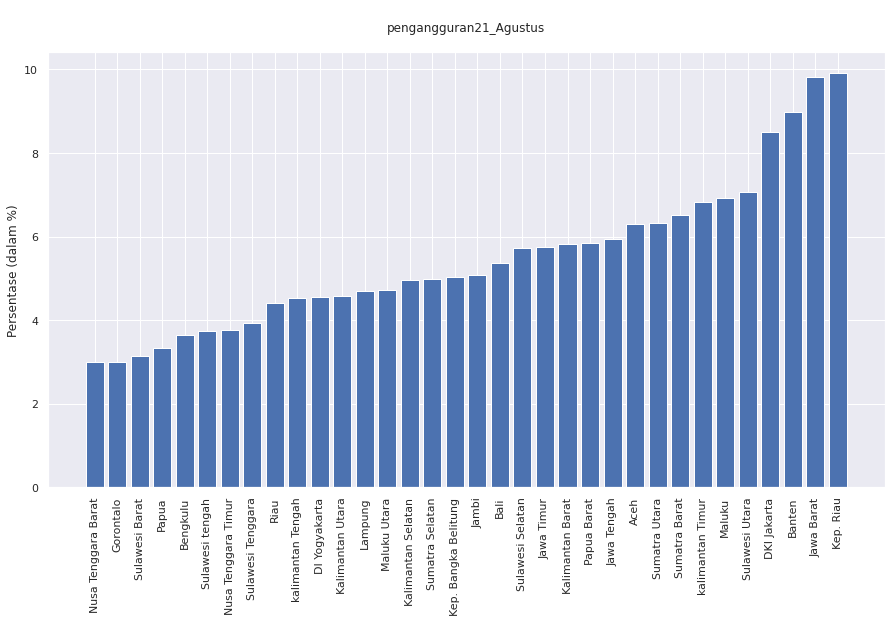

In [ ]:
x_coords = np.arange(len(df))

plt.figure(figsize=(15,8))
plt.bar(x_coords, pengangguran21_Agustus_sort['pengangguran21_Agustus (persen)'], tick_label=pengangguran21_Agustus_sort['Provinsi'], color='b')
plt.xticks(rotation=90)
plt.ylabel('Persentase (dalam %)')
plt.title('\npengangguran21_Agustus\n')
plt.show()

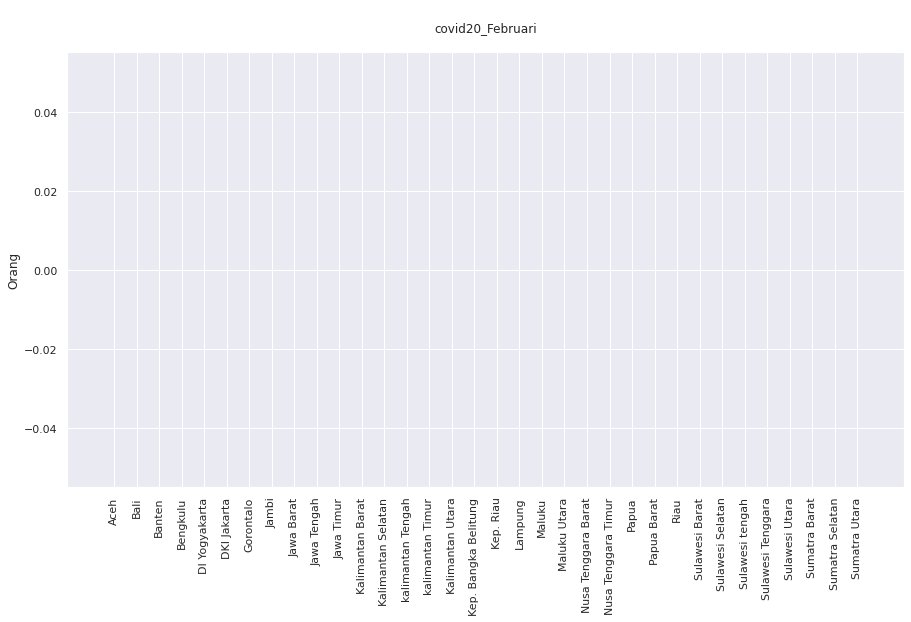

In [ ]:
x_coords = np.arange(len(df))

plt.figure(figsize=(15,8))
plt.bar(x_coords, df['covid20_Februari (orang)'], tick_label=df['Provinsi'], color='b')
plt.xticks(rotation=90)
plt.ylabel('Orang')
plt.title('\ncovid20_Februari\n')
plt.show()

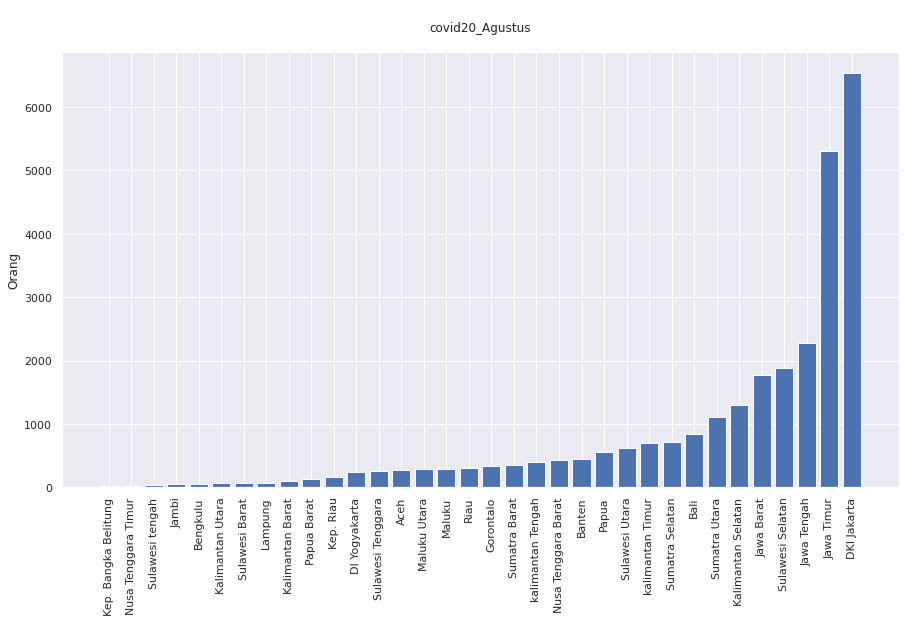

In [ ]:
x_coords = np.arange(len(df))

plt.figure(figsize=(15,8))
plt.bar(x_coords, covid20_Agustus_sort['covid20_Agustus (orang)'], tick_label=covid20_Agustus_sort['Provinsi'], color='b')
plt.xticks(rotation=90)
plt.ylabel('Orang')
plt.title('\ncovid20_Agustus\n')
plt.show()

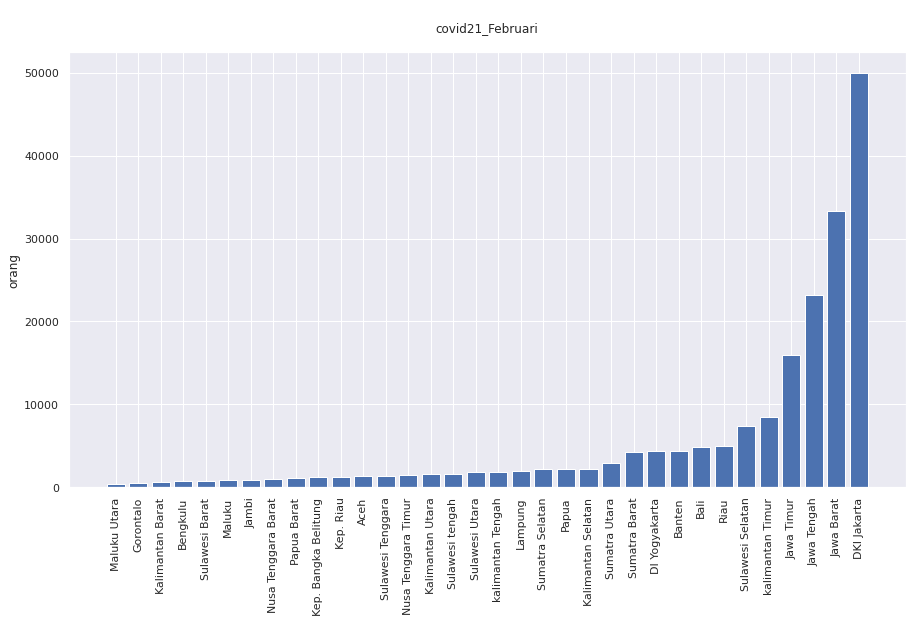

In [ ]:
x_coords = np.arange(len(df))

plt.figure(figsize=(15,8))
plt.bar(x_coords, covid21_Februari_sort['covid21_Februari (orang)'], tick_label=covid21_Februari_sort['Provinsi'], color='b')
plt.xticks(rotation=90)
plt.ylabel('orang')
plt.title('\ncovid21_Februari\n')
plt.show()

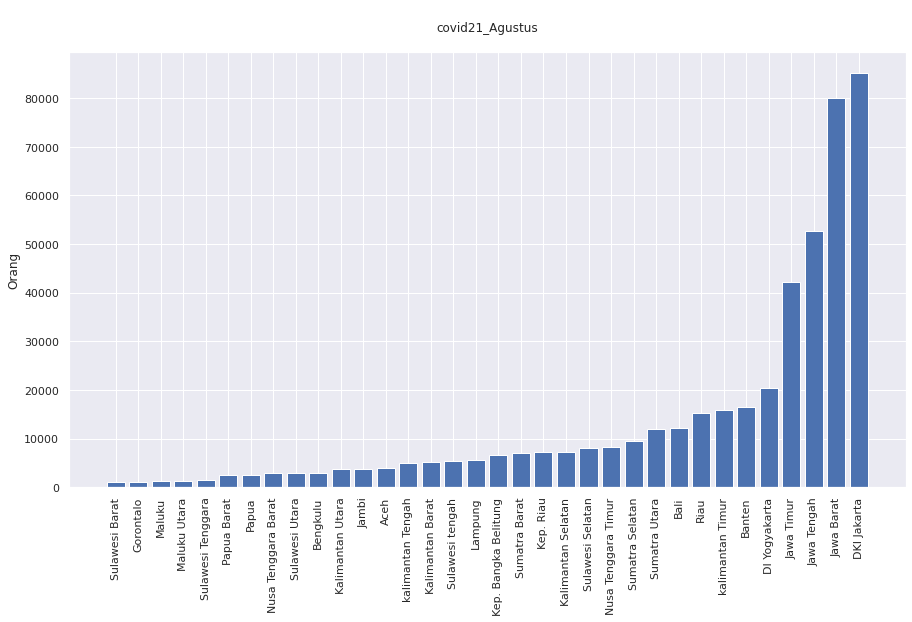

In [ ]:
x_coords = np.arange(len(df))

plt.figure(figsize=(15,8))
plt.bar(x_coords, covid21_Agustus_sort['covid21_Agustus (orang)'], tick_label=covid21_Agustus_sort['Provinsi'], color='b')
plt.xticks(rotation=90)
plt.ylabel('Orang')
plt.title('\ncovid21_Agustus\n')
plt.show()

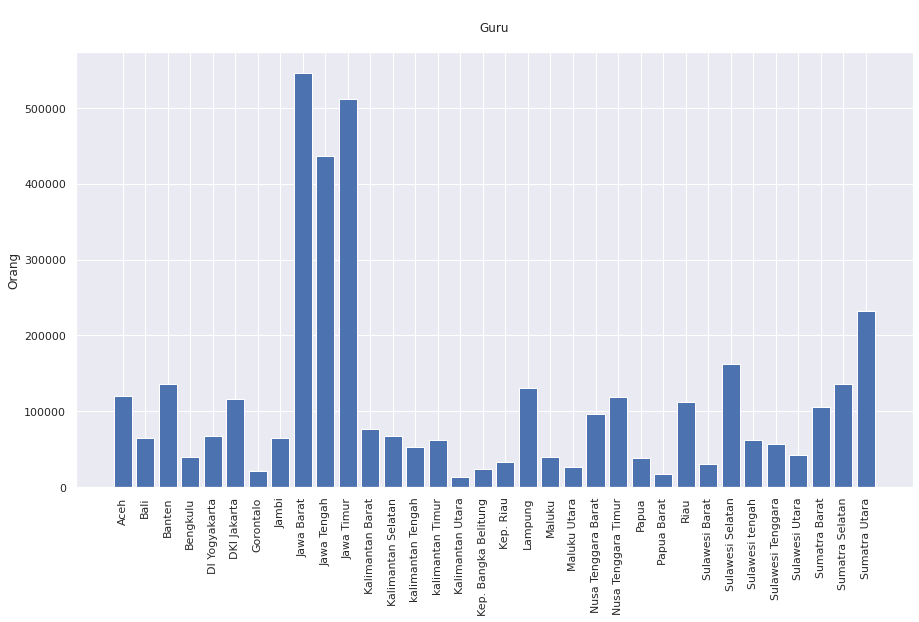

In [ ]:
x_coords = np.arange(len(df))

plt.figure(figsize=(15,8))
plt.bar(x_coords, df['Guru (orang)'], tick_label=df['Provinsi'], color='b')
plt.xticks(rotation=90)
plt.ylabel('Orang')
plt.title('\nGuru\n')
plt.show()

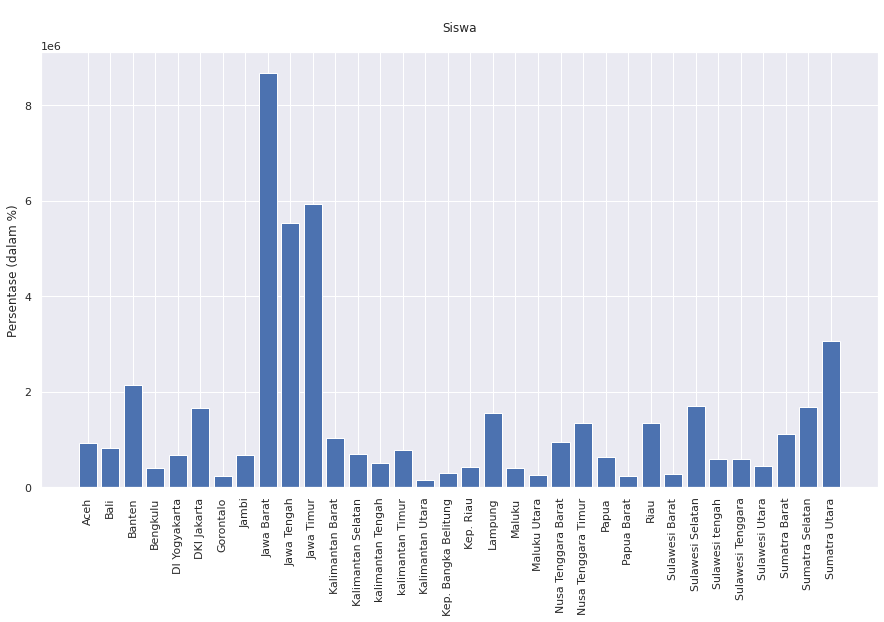

In [ ]:
x_coords = np.arange(len(df))

plt.figure(figsize=(15,8))
plt.bar(x_coords, df['Siswa (orang)'], tick_label=df['Provinsi'], color='b')
plt.xticks(rotation=90)
plt.ylabel('Persentase (dalam %)')
plt.title('\nSiswa\n')
plt.show()

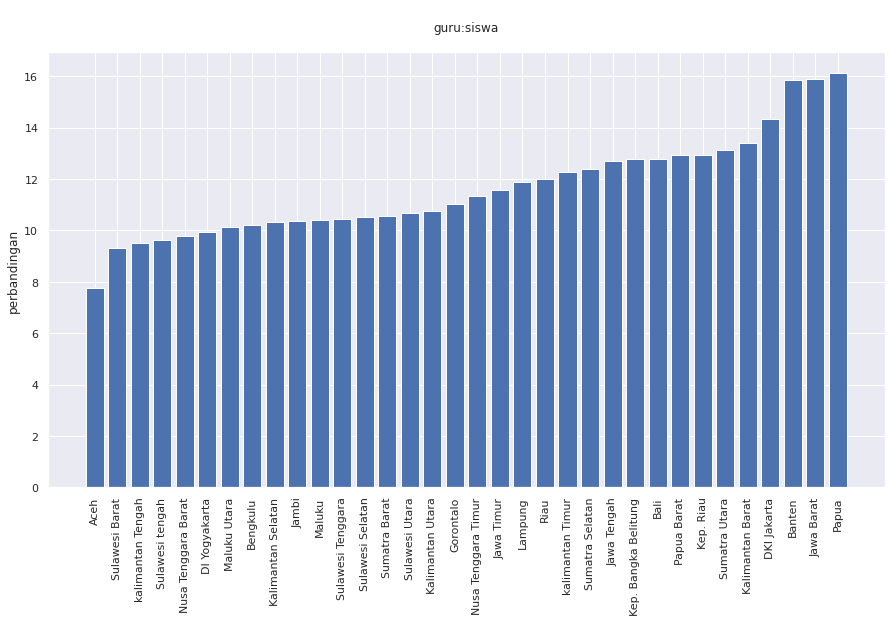

In [ ]:
x_coords = np.arange(len(df))

plt.figure(figsize=(15,8))
plt.bar(x_coords, GuruVsSiswa_sort['guru:siswa'], tick_label=GuruVsSiswa_sort['Provinsi'], color='b')
plt.xticks(rotation=90)
plt.ylabel('perbandingan')
plt.title('\nguru:siswa\n')
plt.show()

# Distribusi

---
**pengangguran20_Februari**

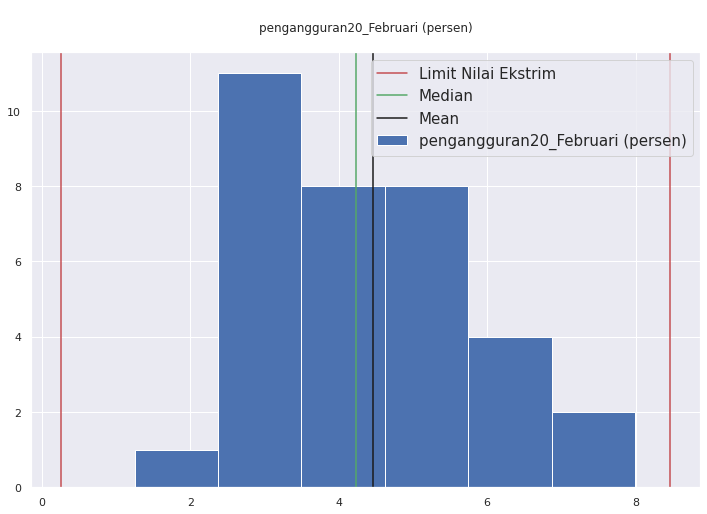

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['pengangguran20_Februari (persen)'], bins=6, label='pengangguran20_Februari (persen)')

ax.axvline(limit_atas_pengangguran20_Feb, color='r', label='Limit Nilai Ekstrim')
ax.axvline(limit_bawah_pengangguran20_Feb, color='r')

ax.axvline(median_pengangguran20_Feb, color='g', label='Median')
ax.axvline(mean_pengangguran20_Feb, color='k', label='Mean')

plt.title("\npengangguran20_Februari (persen)\n")
plt.legend(loc='best', prop={'size':15})

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


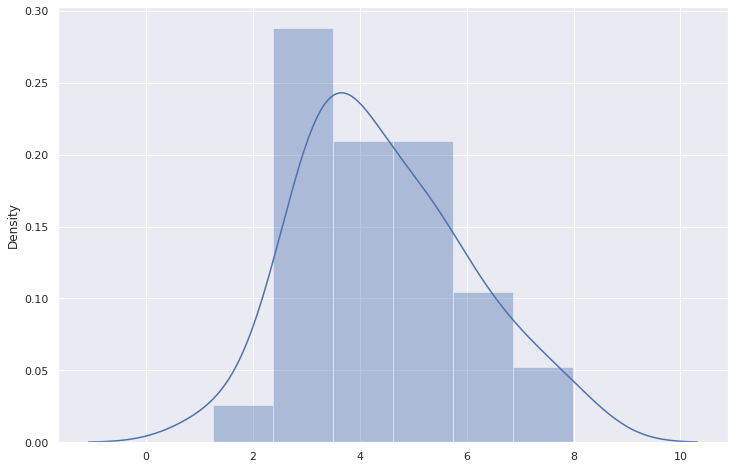

In [ ]:
sns.distplot(pengangguran_20_Feb, color='b')

---
**pengangguran20_Agustus**

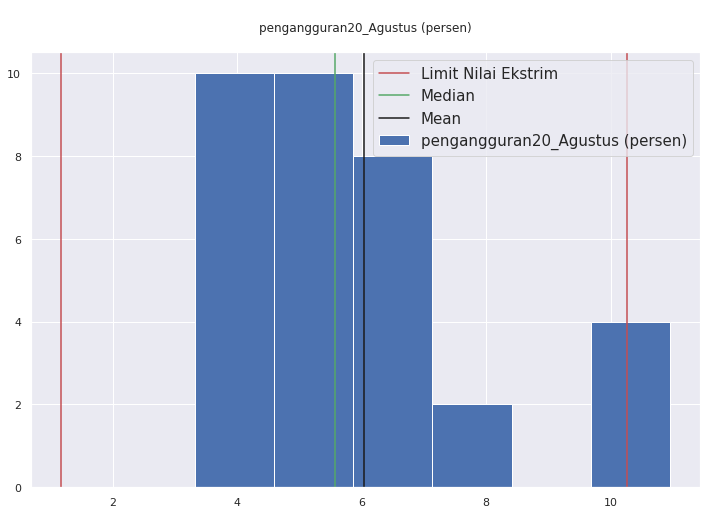

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['pengangguran20_Agustus (persen)'], bins=6, label='pengangguran20_Agustus (persen)')

ax.axvline(limit_atas_pengangguran20_Agus, color='r', label='Limit Nilai Ekstrim')
ax.axvline(limit_bawah_pengangguran20_Agus, color='r')

ax.axvline(median_pengangguran20_Agus, color='g', label='Median')
ax.axvline(mean_pengangguran20_Agus, color='k', label='Mean')

plt.title("\npengangguran20_Agustus (persen)\n")
plt.legend(loc='best', prop={'size':15})

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


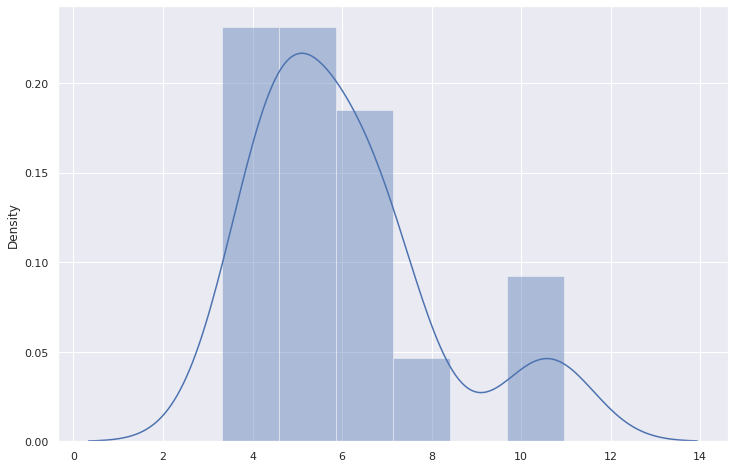

In [ ]:
sns.distplot(pengangguran_20_Agus, color='b')

---
**pengangguran21_Februari**

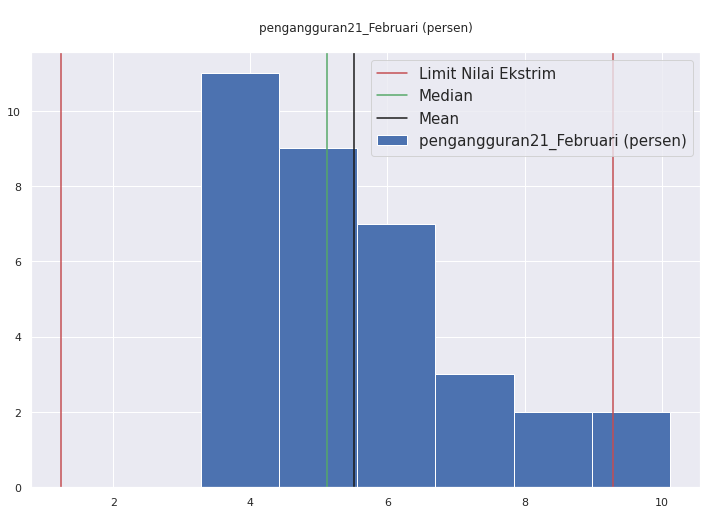

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['pengangguran21_Februari (persen)'], bins=6, label='pengangguran21_Februari (persen)')

ax.axvline(limit_atas_pengangguran21_Feb, color='r', label='Limit Nilai Ekstrim')
ax.axvline(limit_bawah_pengangguran21_Feb, color='r')

ax.axvline(median_pengangguran21_Feb, color='g', label='Median')
ax.axvline(mean_pengangguran21_Feb, color='k', label='Mean')

plt.title("\npengangguran21_Februari (persen)\n")
plt.legend(loc='best', prop={'size':15})

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


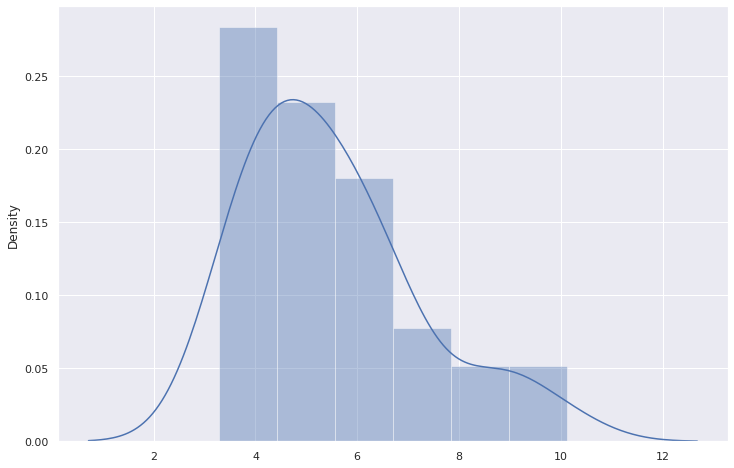

In [ ]:
sns.distplot(pengangguran_21_Feb, color='b')

--- 
**pengangguran21_Agustus**

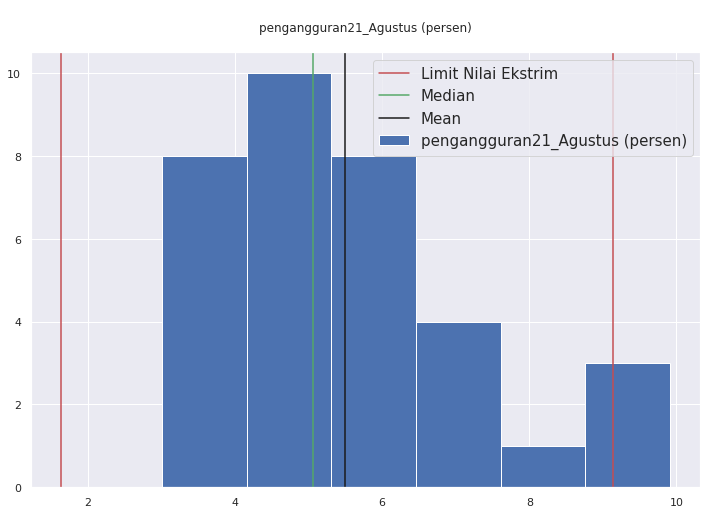

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['pengangguran21_Agustus (persen)'], bins=6, label='pengangguran21_Agustus (persen)')

ax.axvline(limit_atas_pengangguran21_Agus, color='r', label='Limit Nilai Ekstrim')
ax.axvline(limit_bawah_pengangguran21_Agus, color='r')

ax.axvline(median_pengangguran21_Agus, color='g', label='Median')
ax.axvline(mean_pengangguran21_Agus, color='k', label='Mean')

plt.title("\npengangguran21_Agustus (persen)\n")
plt.legend(loc='best', prop={'size':15})

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


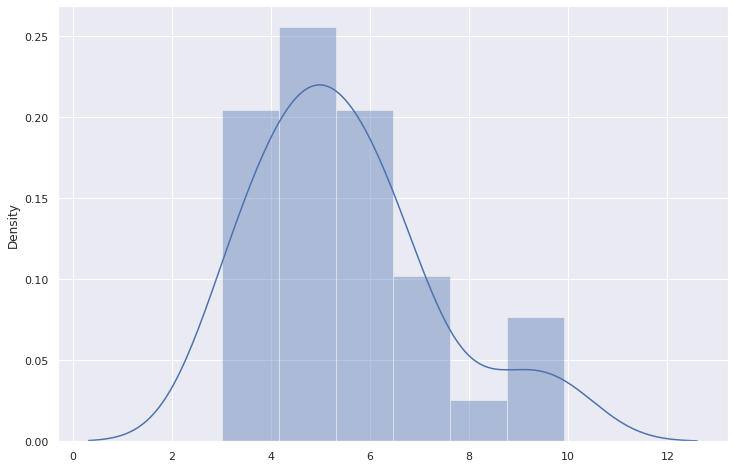

In [ ]:
sns.distplot(pengangguran_21_Agus, color='b')

---
**covid20_Agustus**

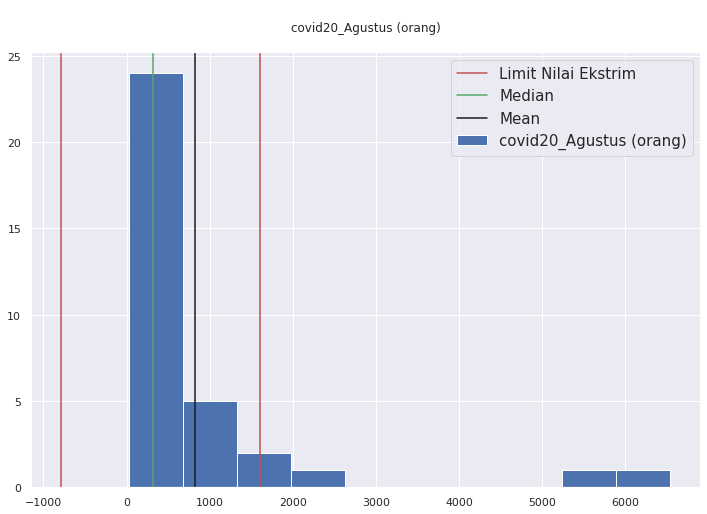

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['covid20_Agustus (orang)'], bins=10, label='covid20_Agustus (orang)')

ax.axvline(limit_atas_covid20_Agus, color='r', label='Limit Nilai Ekstrim')
ax.axvline(limit_bawah_covid20_Agus, color='r')

ax.axvline(median_covid20_Agus, color='g', label='Median')
ax.axvline(mean_covid20_Agus, color='k', label='Mean')

plt.title("\ncovid20_Agustus (orang)\n")
plt.legend(loc='best', prop={'size':15})

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


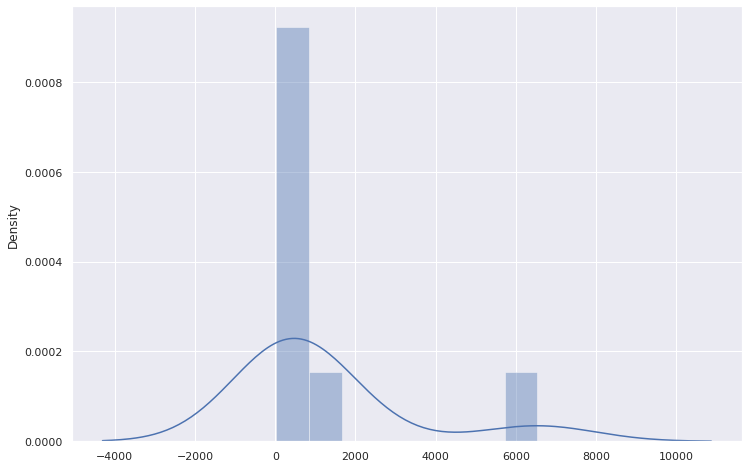

In [ ]:
sns.distplot(covid20_Agus, color='b')

---
**covid21_Februari**

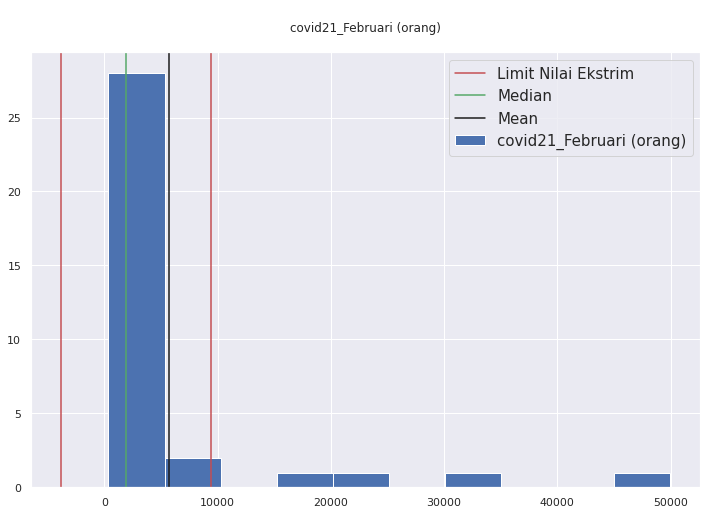

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['covid21_Februari (orang)'], bins=10, label='covid21_Februari (orang)')

ax.axvline(limit_atas_covid21_Feb, color='r', label='Limit Nilai Ekstrim')
ax.axvline(limit_bawah_covid21_Feb, color='r')

ax.axvline(median_covid21_Feb, color='g', label='Median')
ax.axvline(mean_covid21_Feb, color='k', label='Mean')

plt.title("\ncovid21_Februari (orang)\n")
plt.legend(loc='best', prop={'size':15})

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


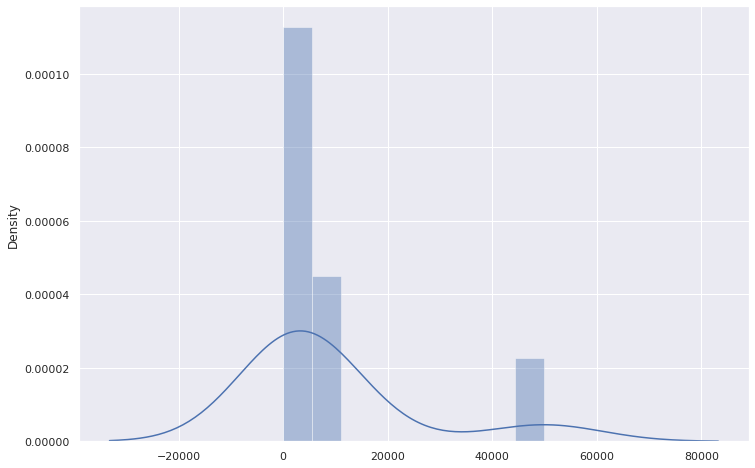

In [ ]:
sns.distplot(covid21_Feb, color='b')

---
**covid21_Agustus**

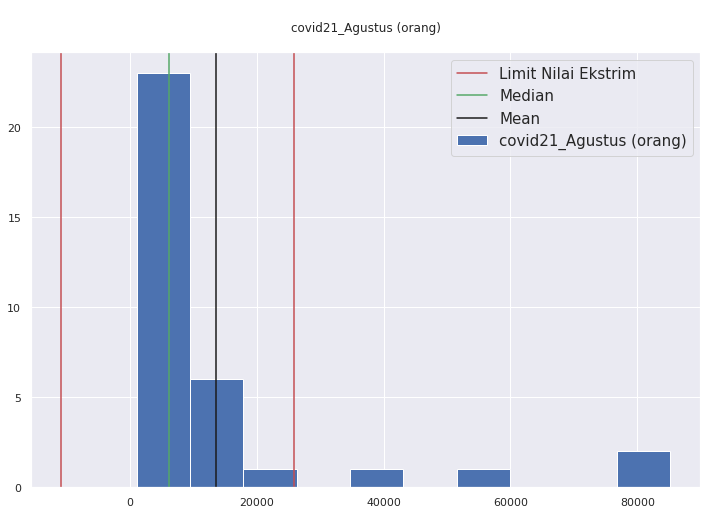

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['covid21_Agustus (orang)'], bins=10, label='covid21_Agustus (orang)')

ax.axvline(limit_atas_covid21_Agus, color='r', label='Limit Nilai Ekstrim')
ax.axvline(limit_bawah_covid21_Agus, color='r')

ax.axvline(median_covid21_Agus, color='g', label='Median')
ax.axvline(mean_covid21_Agus, color='k', label='Mean')

plt.title("\ncovid21_Agustus (orang)\n")
plt.legend(loc='best', prop={'size':15})

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


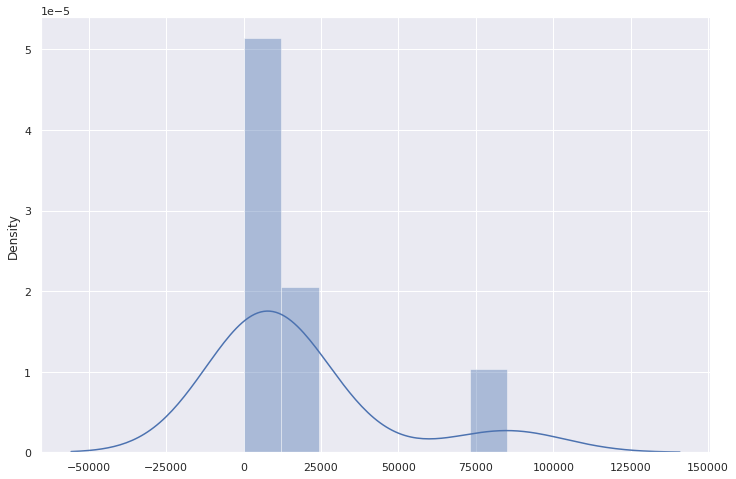

In [ ]:
sns.distplot(covid21_Agus, color='b')

---
**Guru**

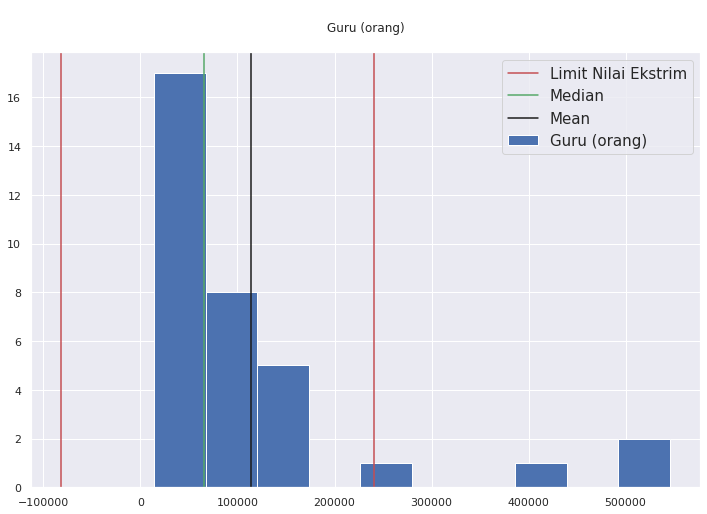

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['Guru (orang)'], bins=10, label='Guru (orang)')

ax.axvline(limit_atas_Guru, color='r', label='Limit Nilai Ekstrim')
ax.axvline(limit_bawah_Guru, color='r')

ax.axvline(median_Guru, color='g', label='Median')
ax.axvline(mean_Guru, color='k', label='Mean')

plt.title("\nGuru (orang)\n")
plt.legend(loc='best', prop={'size':15})

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


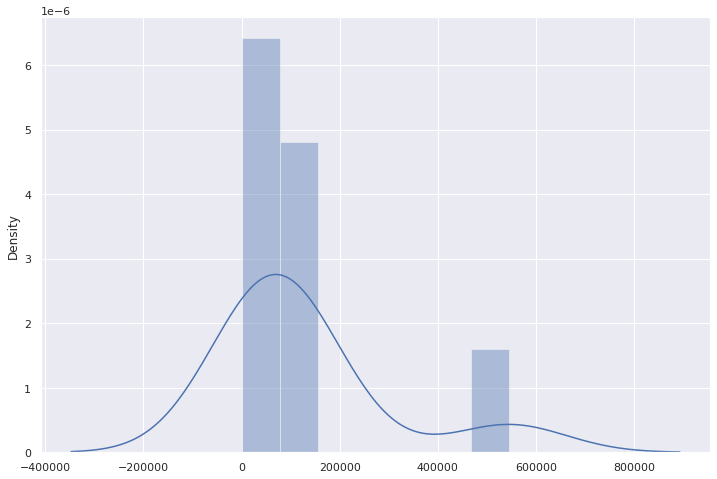

In [ ]:
sns.distplot(Guru, color='b')

---
**Siswa**

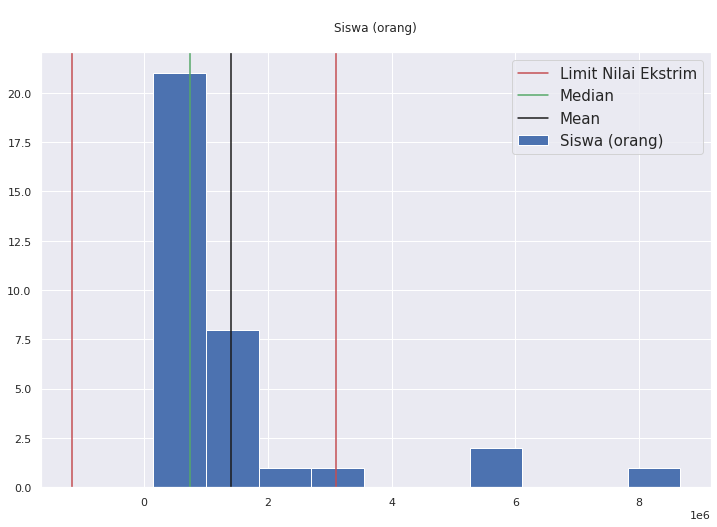

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['Siswa (orang)'], bins=10, label='Siswa (orang)')

ax.axvline(limit_atas_Siswa, color='r', label='Limit Nilai Ekstrim')
ax.axvline(limit_bawah_Siswa, color='r')

ax.axvline(median_Siswa, color='g', label='Median')
ax.axvline(mean_Siswa, color='k', label='Mean')

plt.title("\nSiswa (orang)\n")
plt.legend(loc='best', prop={'size':15})

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


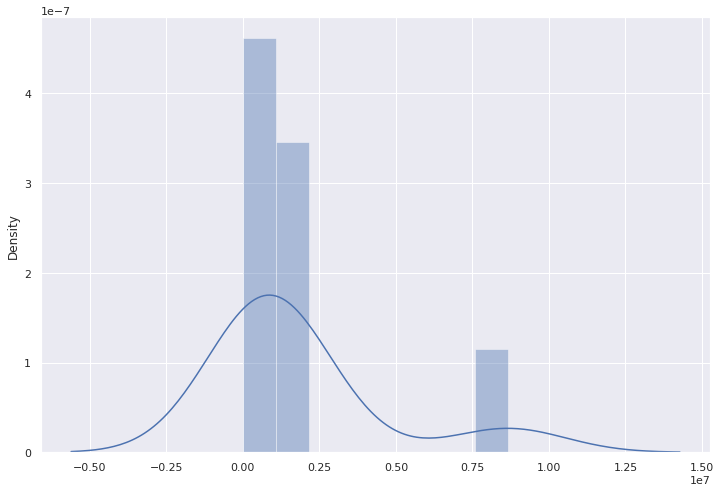

In [ ]:
sns.distplot(Siswa, color='b')

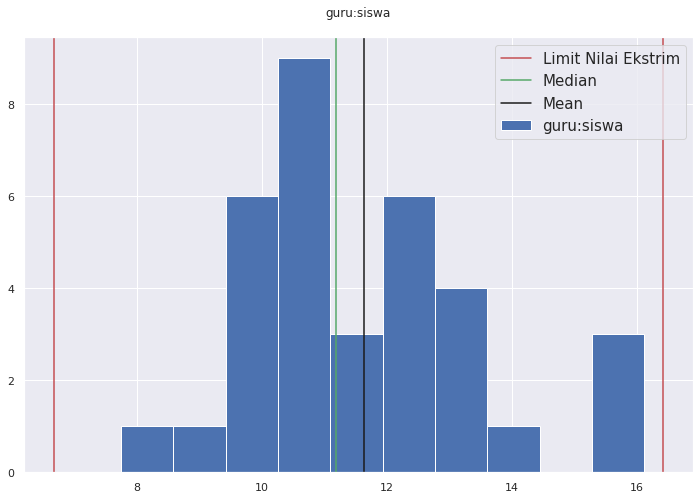

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(df['guru:siswa'], bins=10, label='guru:siswa')

ax.axvline(limit_atas_siswaVSguru, color='r', label='Limit Nilai Ekstrim')
ax.axvline(limit_bawah_siswaVSguru, color='r')

ax.axvline(median_siswaVSguru, color='g', label='Median')
ax.axvline(mean_siswaVSguru, color='k', label='Mean')

plt.title("guru:siswa\n")
plt.legend(loc='best', prop={'size':15})

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


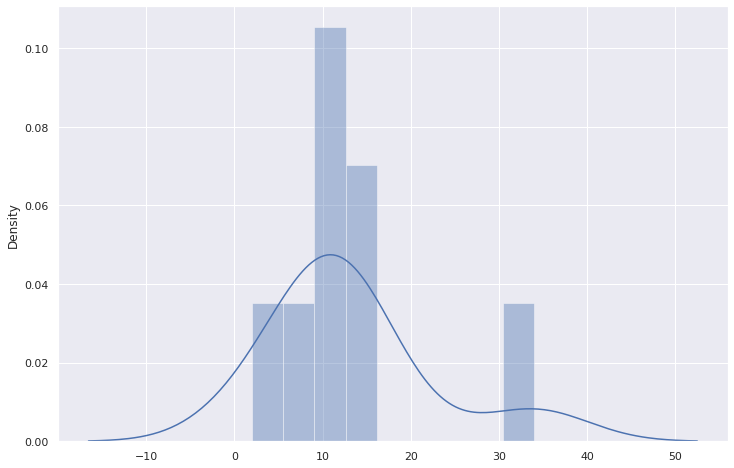

In [ ]:
sns.distplot(siswaVSguru, color='b')

# Uji Distribusi dengan shapiro

In [ ]:
def normality_test(data):
  
  alpha = 0.05

  stat, p = shapiro(data) 

  if p == 1:
      return "Data 0\n"
  elif p > alpha:
      return f"nilai stat = {stat:.2f}, p-value = {p:.10f}\n=> h0 diterima, data berdistribusi normal\n"
  else:
      return f"nilai stat = {stat:.2f}, p-value = {p:.10f}\n=> h0 ditolak, data tidak berdistribusi normal\n"

In [ ]:
print(normality_test(df['covid20_Februari (orang)']))
print(normality_test(df['covid20_Agustus (orang)']))
print(normality_test(df['covid21_Februari (orang)']))
print(normality_test(df['covid21_Agustus (orang)'])) 

Data 0

nilai stat = 0.56, p-value = 0.0000000065
=> h0 ditolak, data tidak berdistribusi normal

nilai stat = 0.52, p-value = 0.0000000021
=> h0 ditolak, data tidak berdistribusi normal

nilai stat = 0.59, p-value = 0.0000000140
=> h0 ditolak, data tidak berdistribusi normal



/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [ ]:
print(normality_test(df['pengangguran20_Februari (persen)']))
print(normality_test(df['pengangguran20_Agustus (persen)']))
print(normality_test(df['pengangguran21_Februari (persen)']))
print(normality_test(df['pengangguran20_Agustus (persen)']))

nilai stat = 0.97, p-value = 0.3702291846
=> h0 diterima, data berdistribusi normal

nilai stat = 0.86, p-value = 0.0005564844
=> h0 ditolak, data tidak berdistribusi normal

nilai stat = 0.92, p-value = 0.0127479946
=> h0 ditolak, data tidak berdistribusi normal

nilai stat = 0.86, p-value = 0.0005564844
=> h0 ditolak, data tidak berdistribusi normal



In [ ]:
print(normality_test(df['Guru (orang)']))
print(normality_test(df['Siswa (orang)']))

nilai stat = 0.65, p-value = 0.0000000961
=> h0 ditolak, data tidak berdistribusi normal

nilai stat = 0.62, p-value = 0.0000000360
=> h0 ditolak, data tidak berdistribusi normal



In [ ]:
print(normality_test(df['guru:siswa']))

nilai stat = 0.94, p-value = 0.0600063354
=> h0 diterima, data berdistribusi normal



# baru

In [ ]:
def visualisai_qqplot(data):
    qqplot(data, line='s')
    plt.show()

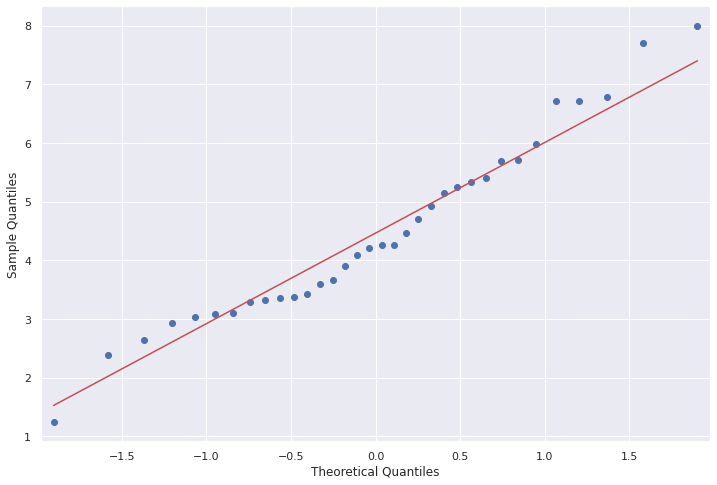

In [ ]:
visualisai_qqplot(df['pengangguran20_Februari (persen)'])

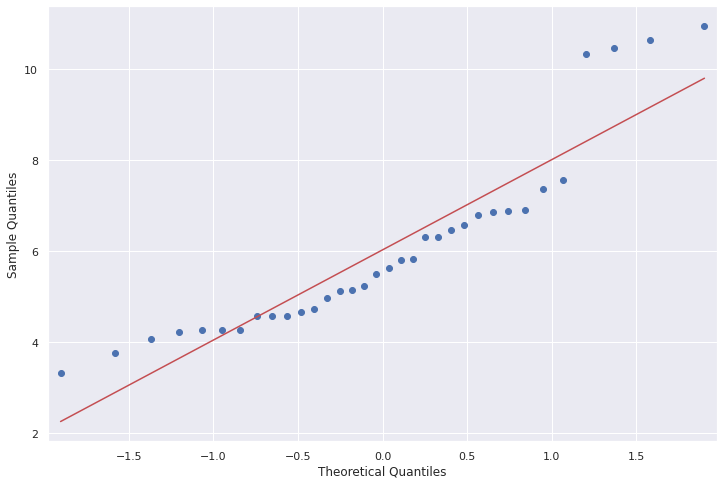

In [ ]:
visualisai_qqplot(df['pengangguran20_Agustus (persen)'])

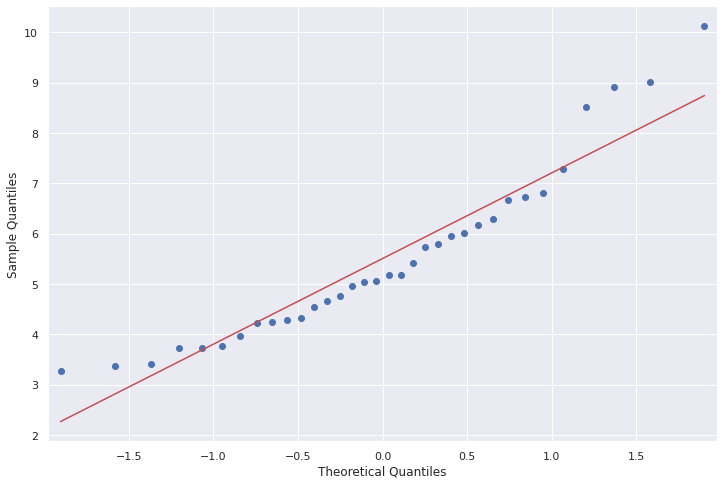

In [ ]:
visualisai_qqplot(df['pengangguran21_Februari (persen)'])

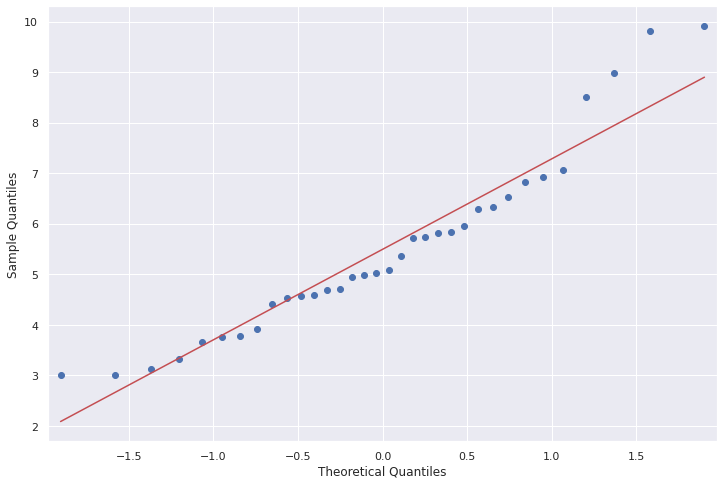

In [ ]:
visualisai_qqplot(df['pengangguran21_Agustus (persen)'])

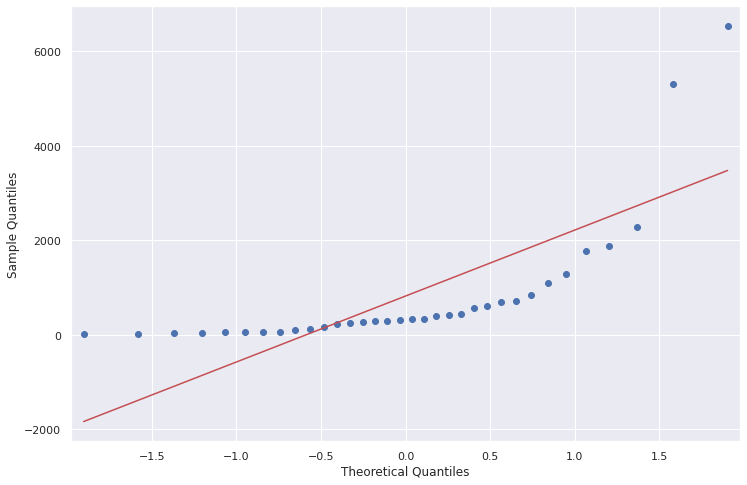

In [ ]:
visualisai_qqplot(df['covid20_Agustus (orang)'])

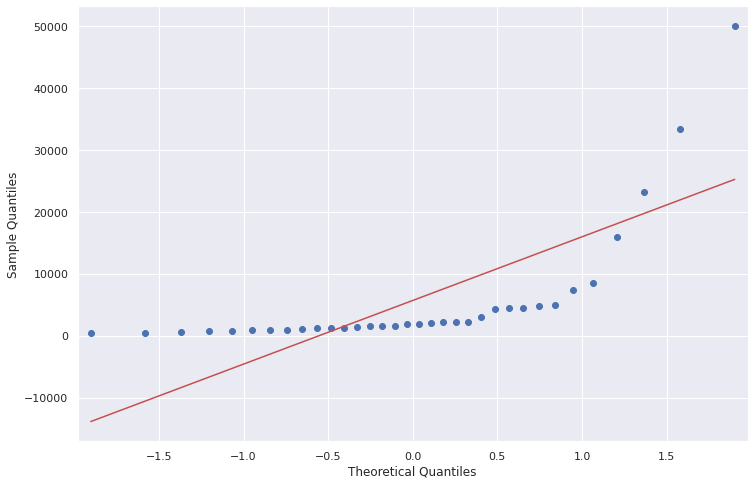

In [ ]:
visualisai_qqplot(df['covid21_Februari (orang)'])

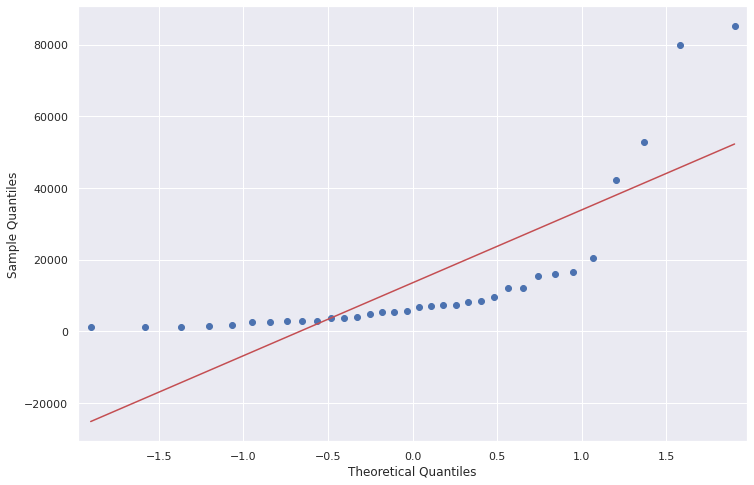

In [ ]:
visualisai_qqplot(df['covid21_Agustus (orang)'])

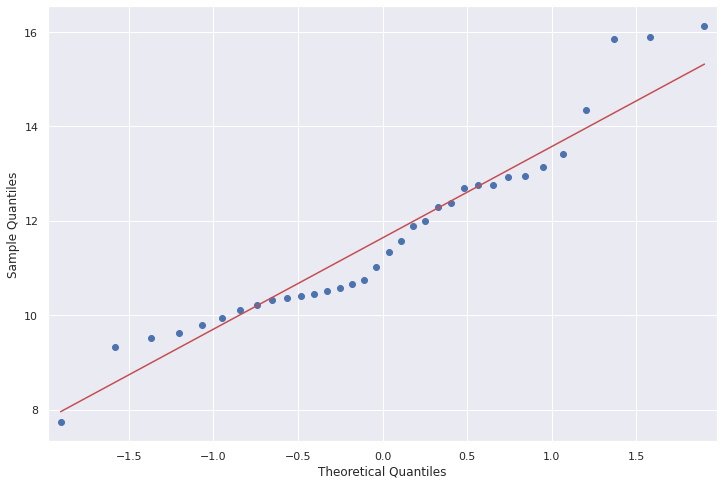

In [ ]:
visualisai_qqplot(df['guru:siswa'])

# Cor

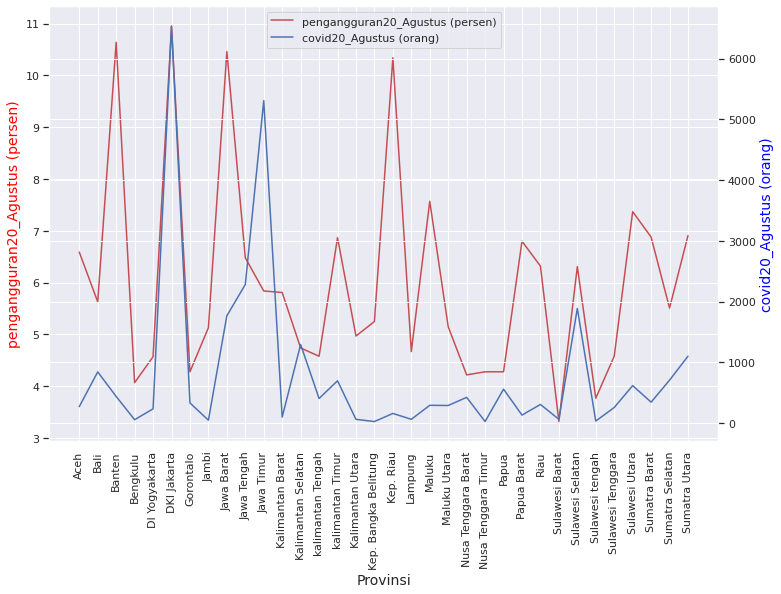

In [ ]:
fig, ax = plt.subplots()
ax.plot([x for x in df["Provinsi"]], [x for x in df["pengangguran20_Agustus (persen)"]], "r-", label = 'pengangguran20_Agustus (persen)', linestyle="-")
ax.set_xlabel("Provinsi",fontsize=14,) 
ax.set_ylabel("pengangguran20_Agustus (persen)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot([x for x in df["Provinsi"]], [y for y in df["covid20_Agustus (orang)"]], label = 'covid20_Agustus (orang)')
ax2.set_ylabel("covid20_Agustus (orang)",color="blue",fontsize=14)
lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center') 
ax.set_xticklabels(df["Provinsi"], rotation = 90) 
plt.show()

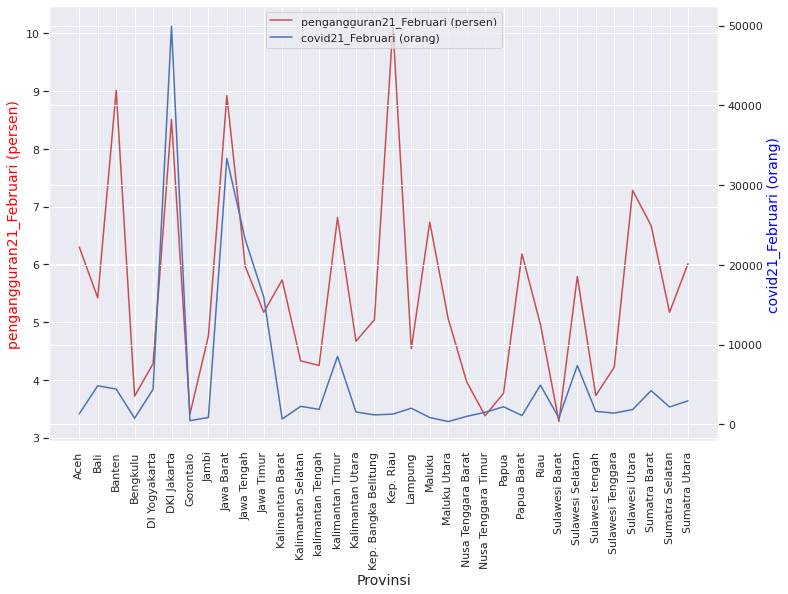

In [ ]:
fig, ax = plt.subplots()
ax.plot([x for x in df["Provinsi"]], [x for x in df["pengangguran21_Februari (persen)"]], "r-", label = 'pengangguran21_Februari (persen)', linestyle="-")
ax.set_xlabel("Provinsi",fontsize=14,) 
ax.set_ylabel("pengangguran21_Februari (persen)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot([x for x in df["Provinsi"]], [y for y in df["covid21_Februari (orang)"]], label = 'covid21_Februari (orang)')
ax2.set_ylabel("covid21_Februari (orang)",color="blue",fontsize=14)
lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center')
ax.set_xticklabels(df["Provinsi"], rotation = 90) 
plt.show()

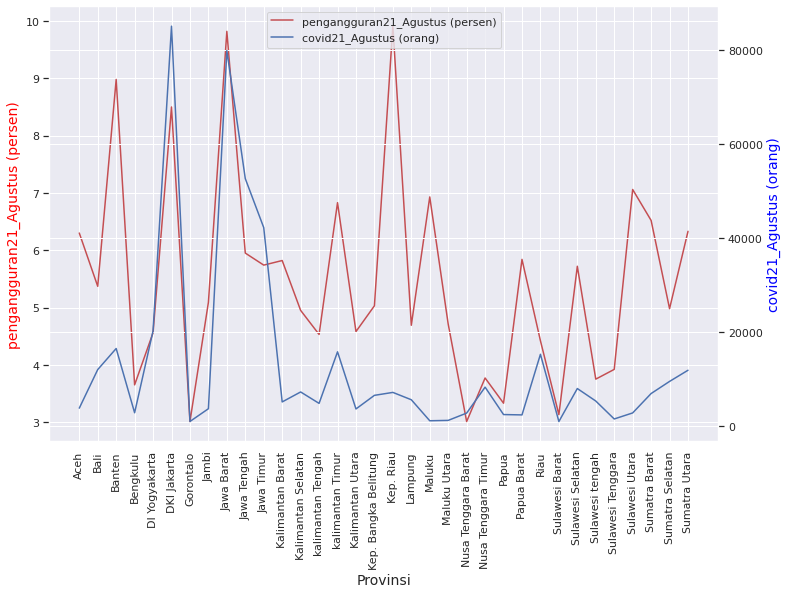

In [ ]:
fig, ax = plt.subplots()
ax.plot([x for x in df["Provinsi"]], [x for x in df["pengangguran21_Agustus (persen)"]], "r-", label = 'pengangguran21_Agustus (persen)', linestyle="-")
ax.set_xlabel("Provinsi",fontsize=14,) 
ax.set_ylabel("pengangguran21_Agustus (persen)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot([x for x in df["Provinsi"]], [y for y in df["covid21_Agustus (orang)"]], label = 'covid21_Agustus (orang)')
ax2.set_ylabel("covid21_Agustus (orang)",color="blue",fontsize=14)
lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center')
ax.set_xticklabels(df["Provinsi"], rotation = 90) 
plt.show()

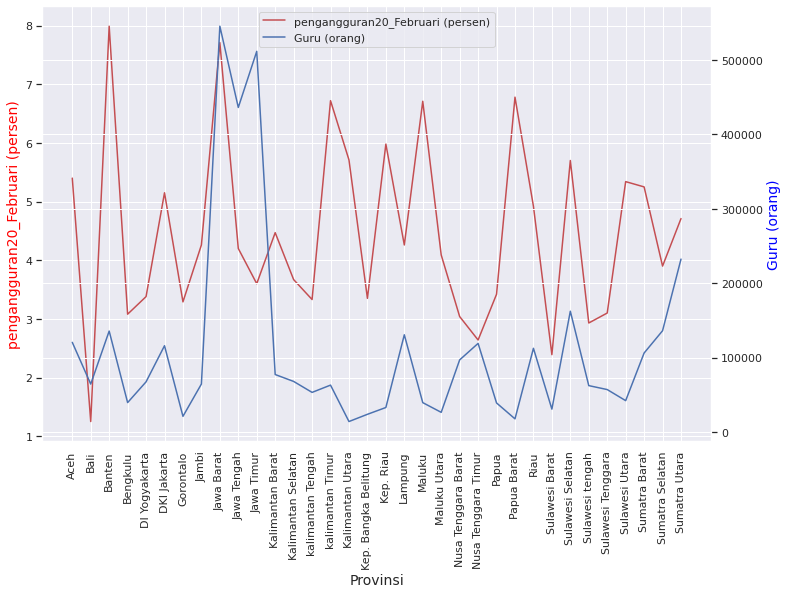

In [ ]:
fig, ax = plt.subplots()
ax.plot([x for x in df["Provinsi"]], [x for x in df["pengangguran20_Februari (persen)"]], "r-", label = 'pengangguran20_Februari (persen)', linestyle="-")
ax.set_xlabel("Provinsi",fontsize=14,) 
ax.set_ylabel("pengangguran20_Februari (persen)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot([x for x in df["Provinsi"]], [y for y in df["Guru (orang)"]], label = 'Guru (orang)')
ax2.set_ylabel("Guru (orang)",color="blue",fontsize=14)
lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center')
ax.set_xticklabels(df["Provinsi"], rotation = 90) 
plt.show()

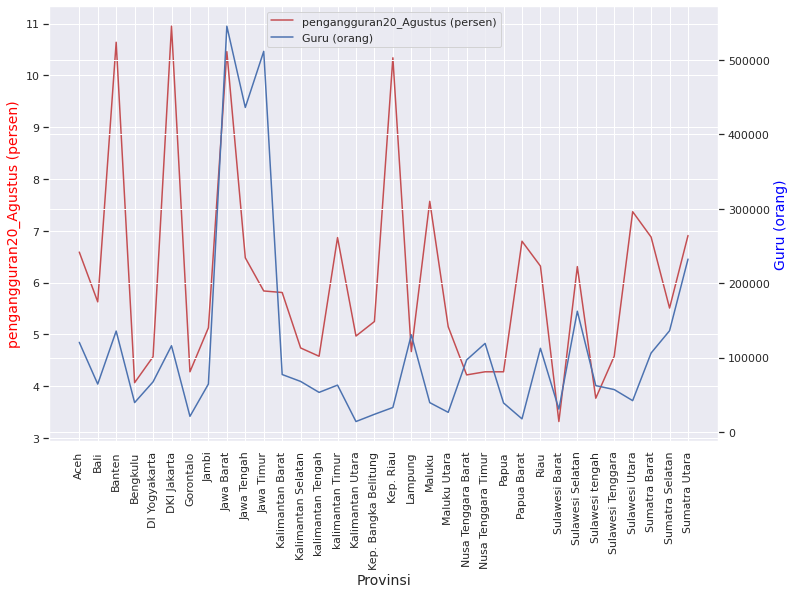

In [ ]:
fig, ax = plt.subplots()
ax.plot([x for x in df["Provinsi"]], [x for x in df["pengangguran20_Agustus (persen)"]], "r-", label = 'pengangguran20_Agustus (persen)', linestyle="-")
ax.set_xlabel("Provinsi",fontsize=14,) 
ax.set_ylabel("pengangguran20_Agustus (persen)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot([x for x in df["Provinsi"]], [y for y in df["Guru (orang)"]], label = 'Guru (orang)')
ax2.set_ylabel("Guru (orang)",color="blue",fontsize=14)
lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center')
ax.set_xticklabels(df["Provinsi"], rotation = 90) 
plt.show()

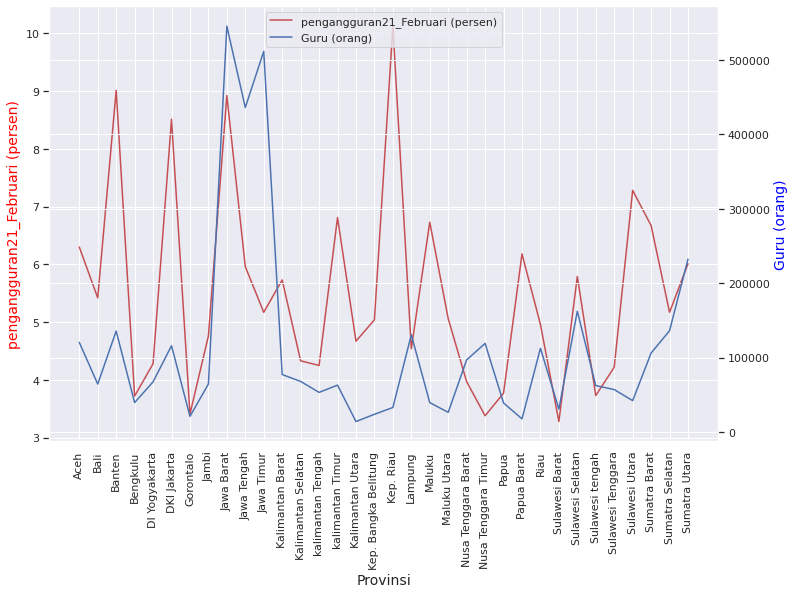

In [ ]:
fig, ax = plt.subplots()
ax.plot([x for x in df["Provinsi"]], [x for x in df["pengangguran21_Februari (persen)"]], "r-", label = 'pengangguran21_Februari (persen)', linestyle="-")
ax.set_xlabel("Provinsi",fontsize=14,) 
ax.set_ylabel("pengangguran21_Februari (persen)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot([x for x in df["Provinsi"]], [y for y in df["Guru (orang)"]], label = 'Guru (orang)')
ax2.set_ylabel("Guru (orang)",color="blue",fontsize=14)
lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center')
ax.set_xticklabels(df["Provinsi"], rotation = 90) 
plt.show()

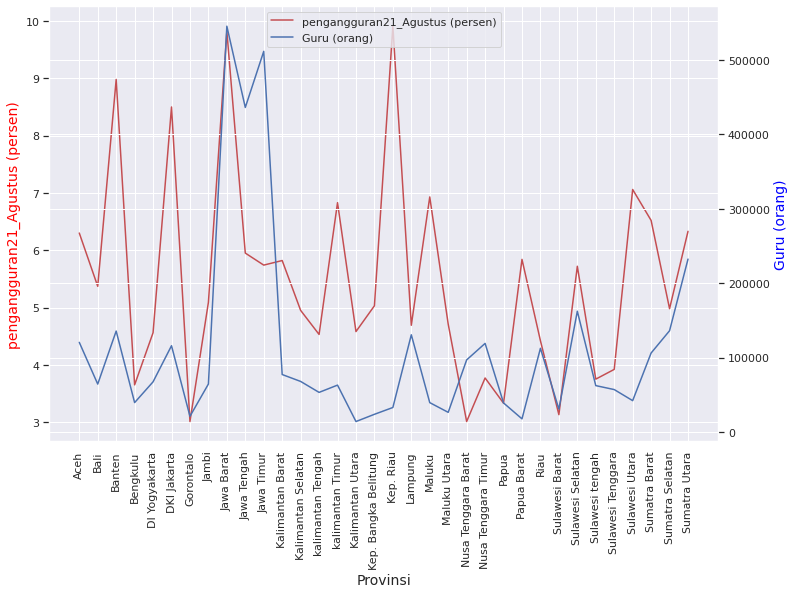

In [ ]:
fig, ax = plt.subplots()
ax.plot([x for x in df["Provinsi"]], [x for x in df["pengangguran21_Agustus (persen)"]], "r-", label = 'pengangguran21_Agustus (persen)', linestyle="-")
ax.set_xlabel("Provinsi",fontsize=14,) 
ax.set_ylabel("pengangguran21_Agustus (persen)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot([x for x in df["Provinsi"]], [y for y in df["Guru (orang)"]], label = 'Guru (orang)')
ax2.set_ylabel("Guru (orang)",color="blue",fontsize=14)
lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center')
ax.set_xticklabels(df["Provinsi"], rotation = 90) 
plt.show()

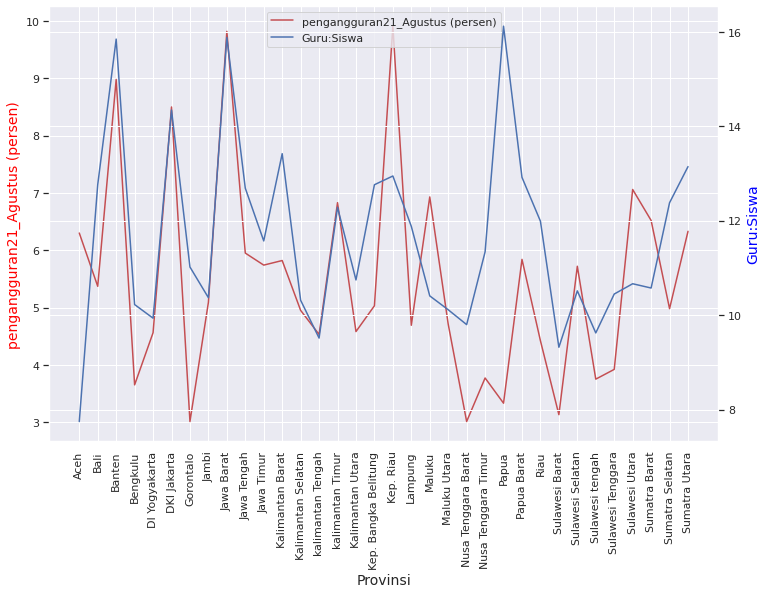

In [ ]:
fig, ax = plt.subplots()
ax.plot([x for x in df["Provinsi"]], [x for x in df["pengangguran21_Agustus (persen)"]], "r-", label = 'pengangguran21_Agustus (persen)', linestyle="-")
ax.set_xlabel("Provinsi",fontsize=14,) 
ax.set_ylabel("pengangguran21_Agustus (persen)",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot([x for x in df["Provinsi"]], [y for y in df["guru:siswa"]], label = 'Guru:Siswa')
ax2.set_ylabel("Guru:Siswa",color="blue",fontsize=14)
lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center')
ax.set_xticklabels(df["Provinsi"], rotation = 90) 
plt.show()

In [ ]:
df.head()

Provinsi  covid20_Februari (orang)  covid20_Agustus (orang)  \
0           Aceh                       0.0                    272.0   
1           Bali                       0.0                    844.0   
2         Banten                       0.0                    440.0   
3       Bengkulu                       0.0                     57.0   
4  DI Yogyakarta                       0.0                    236.0   

   covid21_Februari (orang)  covid21_Agustus (orang)  \
0                    1318.0                   3899.0   
1                    4835.0                  12103.0   
2                    4429.0                  16590.0   
3                     765.0                   2923.0   
4                    4400.0                  20349.0   

   pengangguran20_Februari (persen)  pengangguran20_Agustus (persen)  \
0                              5.40                             6.59   
1                              1.25                             5.63   
2                              7.99                            10.64   
3                              3.08                             4.07   
4                              3.38                             4.57   

   pengangguran21_Februari (persen)  pengangguran21_Agustus (persen)  \
0                              6.30                             6.30   
1                              5.42                             5.37   
2                              9.01                             8.98   
3                              3.72                             3.65   
4                              4.28                             4.56   

   Guru (orang)  Siswa (orang)  guru:siswa  
0        120419         932683    7.745314  
1         64291         820544   12.762968  
2        135593        2148778   15.847264  
3         39392         402717   10.223319  
4         67309         668716    9.935016

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


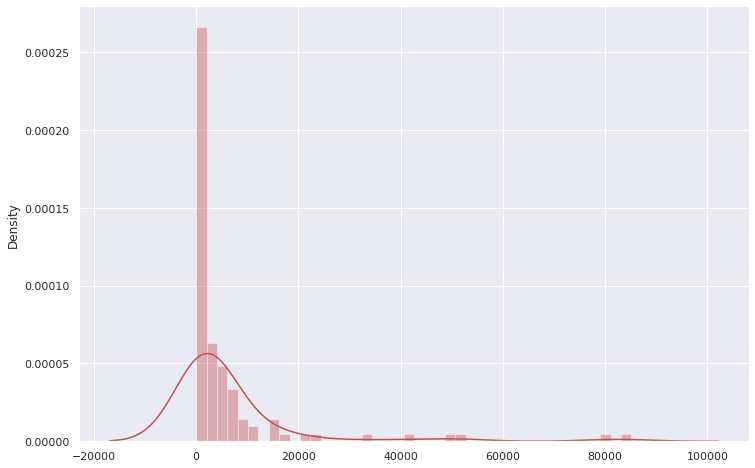

In [ ]:
sns.distplot(df.iloc[:,2:5], color='r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


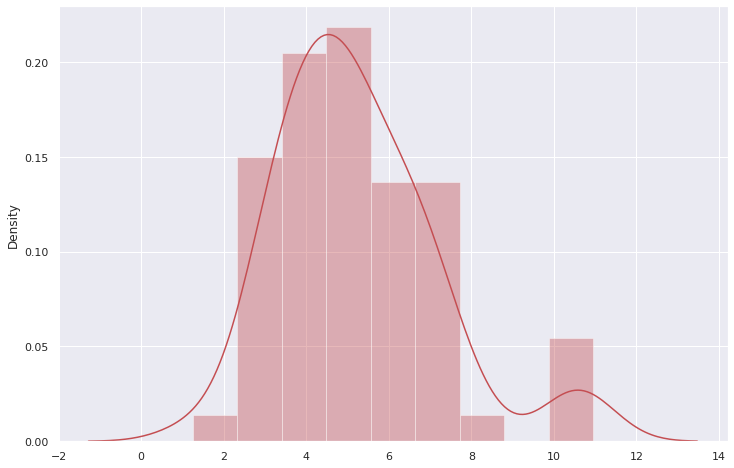

In [ ]:
sns.distplot(df.iloc[:,5:7], color='r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


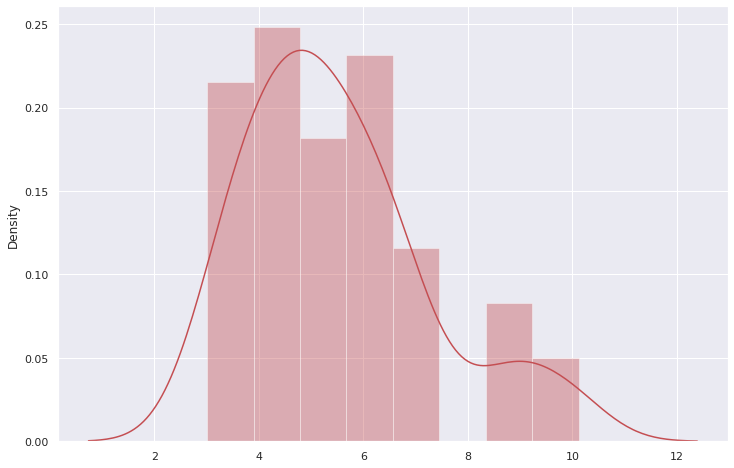

In [ ]:
sns.distplot(df.iloc[:,7:9], color='r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


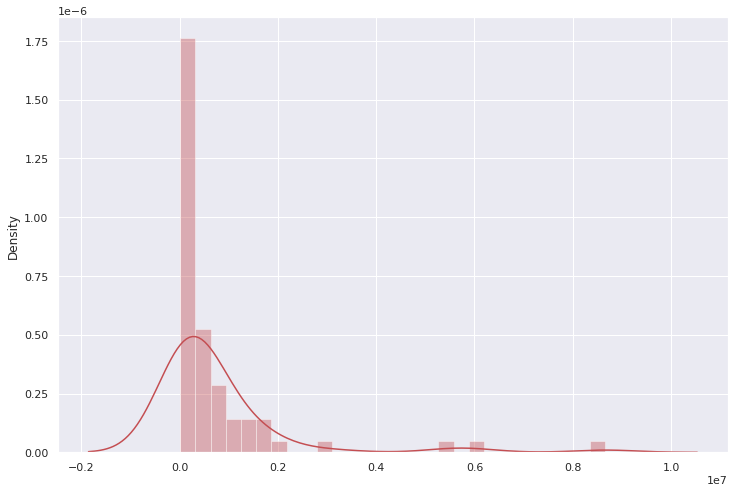

In [ ]:
sns.distplot(df.iloc[:,9:11], color='r')

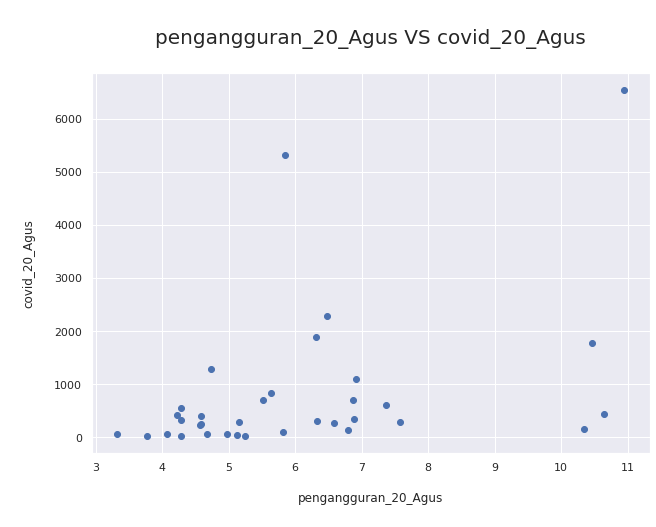

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pengangguran_20_Agus, covid_20_Agus)
plt.title('\npengangguran_20_Agus VS covid_20_Agus\n', fontsize=20)
plt.xlabel('\npengangguran_20_Agus\n')
plt.ylabel('\ncovid_20_Agus\n')
plt.show()

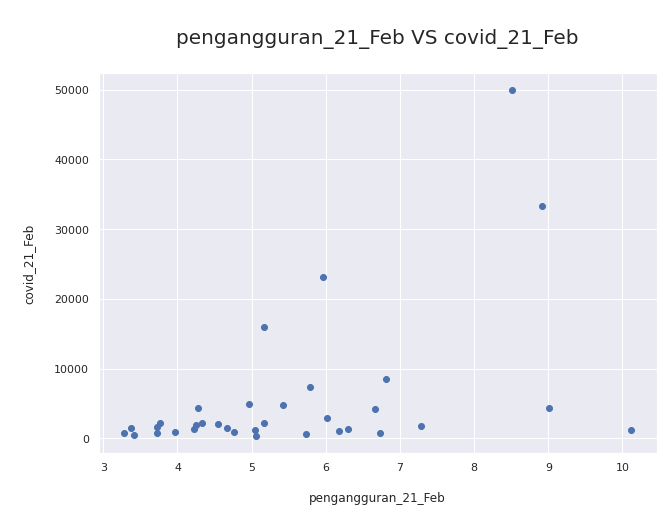

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pengangguran_21_Feb, covid_21_Feb)
plt.title('\npengangguran_21_Feb VS covid_21_Feb\n', fontsize=20)
plt.xlabel('\npengangguran_21_Feb\n')
plt.ylabel('\ncovid_21_Feb\n')
plt.show()

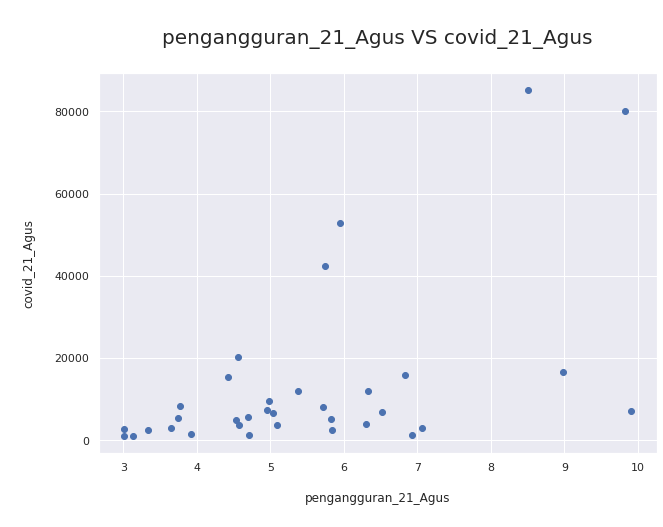

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pengangguran_21_Agus, covid_21_Agus)
plt.title('\npengangguran_21_Agus VS covid_21_Agus\n', fontsize=20)
plt.xlabel('\npengangguran_21_Agus\n')
plt.ylabel('\ncovid_21_Agus\n')
plt.show() 

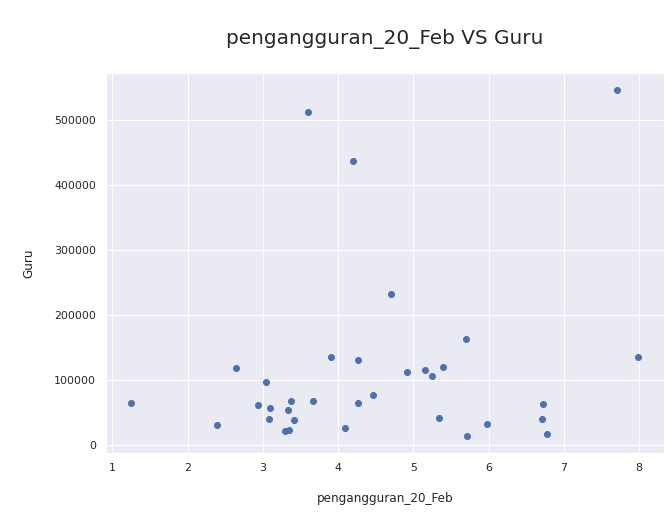

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pengangguran_20_Feb, df.iloc[:,9:10]) 
plt.title('\npengangguran_20_Feb VS Guru\n', fontsize=20)
plt.xlabel('\npengangguran_20_Feb\n')
plt.ylabel('\nGuru\n')
plt.show()

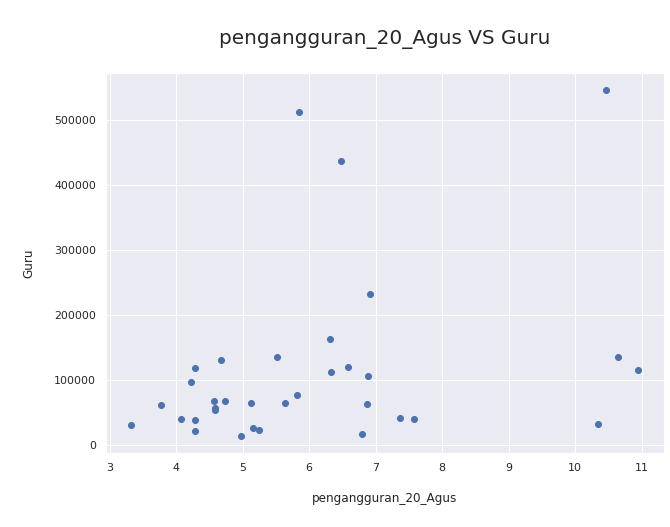

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pengangguran_20_Agus, df.iloc[:,9:10])
plt.title('\npengangguran_20_Agus VS Guru\n', fontsize=20)
plt.xlabel('\npengangguran_20_Agus\n')
plt.ylabel('\nGuru\n')
plt.show()

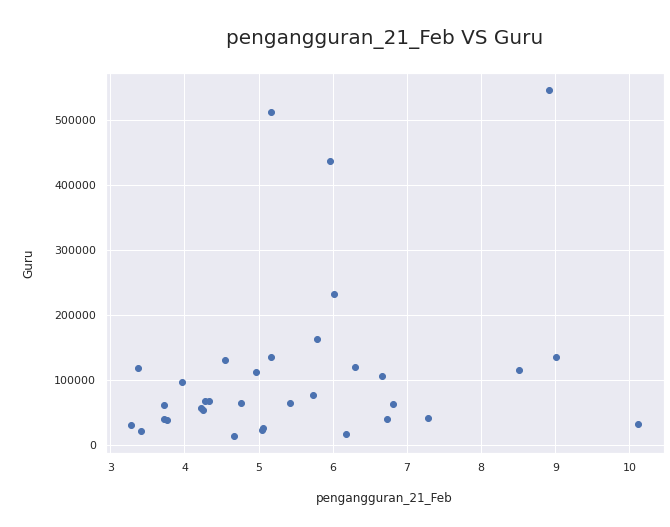

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pengangguran_21_Feb, df.iloc[:,9:10])
plt.title('\npengangguran_21_Feb VS Guru\n', fontsize=20)
plt.xlabel('\npengangguran_21_Feb\n')
plt.ylabel('\nGuru\n')
plt.show()

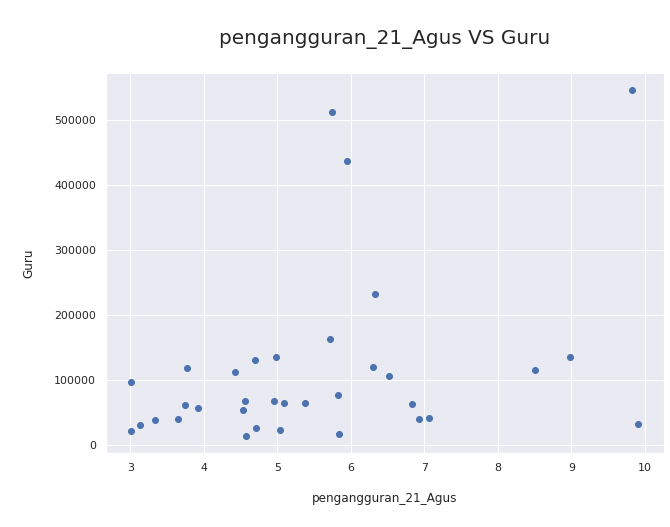

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(pengangguran_21_Agus, df.iloc[:,9:10])
plt.title('\npengangguran_21_Agus VS Guru\n', fontsize=20)
plt.xlabel('\npengangguran_21_Agus\n')
plt.ylabel('\nGuru\n')
plt.show()

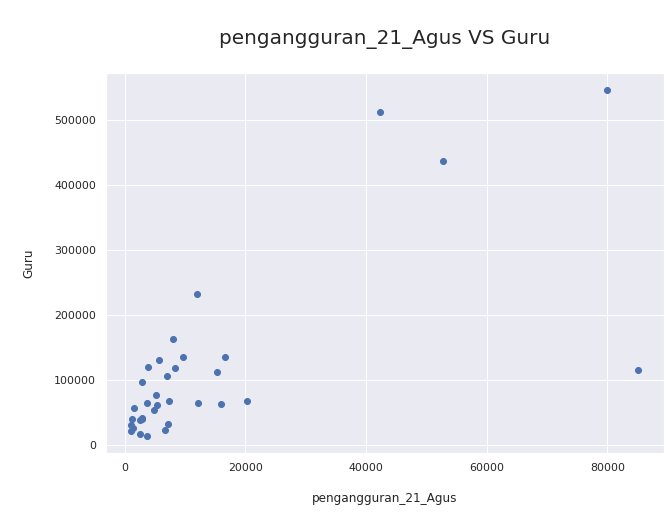

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(covid_21_Agus, df.iloc[:,9:10]) 
plt.title('\npengangguran_21_Agus VS Guru\n', fontsize=20)
plt.xlabel('\npengangguran_21_Agus\n')
plt.ylabel('\nGuru\n')
plt.show()

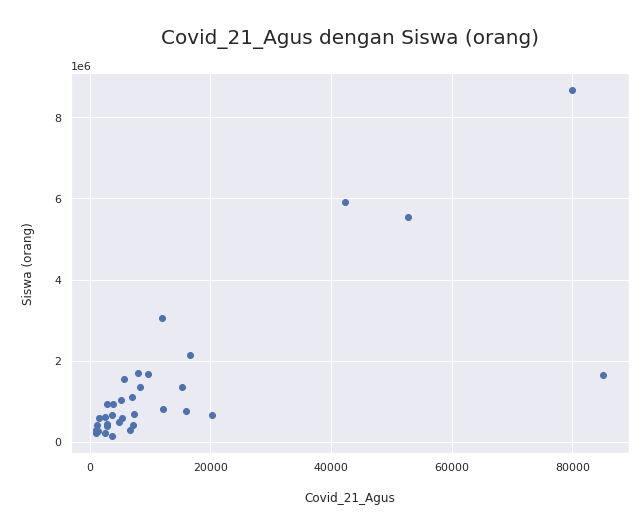

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(covid_21_Agus, df['Siswa (orang)']) 
plt.title('\nCovid_21_Agus dengan Siswa (orang)\n', fontsize=20)
plt.xlabel('\nCovid_21_Agus\n')
plt.ylabel('\nSiswa (orang)\n')
plt.show()

multikolinearitas tidak terpenuhi, uji selanjutnya --> Kruskal wales, non parametrik, or spearman rank

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Korelasi

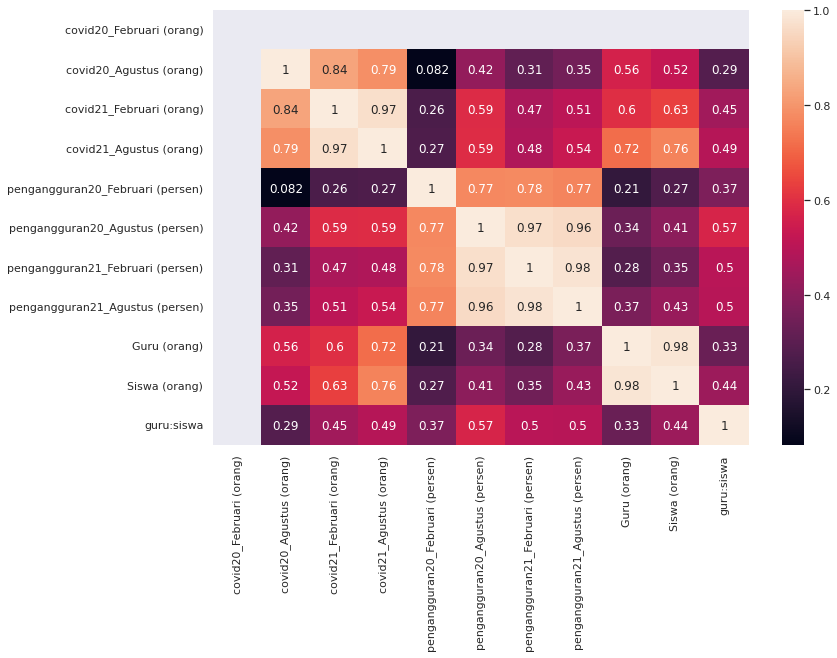

In [ ]:
import seaborn as sns

corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns, 
        yticklabels=corr.columns, 
        annot=True)

In [ ]:
drop = df.drop(['covid20_Februari (orang)', 'covid20_Agustus (orang)', 'covid21_Februari (orang)', 'pengangguran20_Februari (persen)','pengangguran20_Agustus (persen)', 'pengangguran21_Februari (persen)', 'Guru (orang)','Siswa (orang)'], axis=1, inplace=False)
drop2 = df.drop(['covid20_Februari (orang)', 'covid20_Agustus (orang)', 'covid21_Februari (orang)', 'pengangguran20_Februari (persen)','pengangguran20_Agustus (persen)', 'pengangguran21_Februari (persen)', 'Guru (orang)','guru:siswa'], axis=1, inplace=False) 

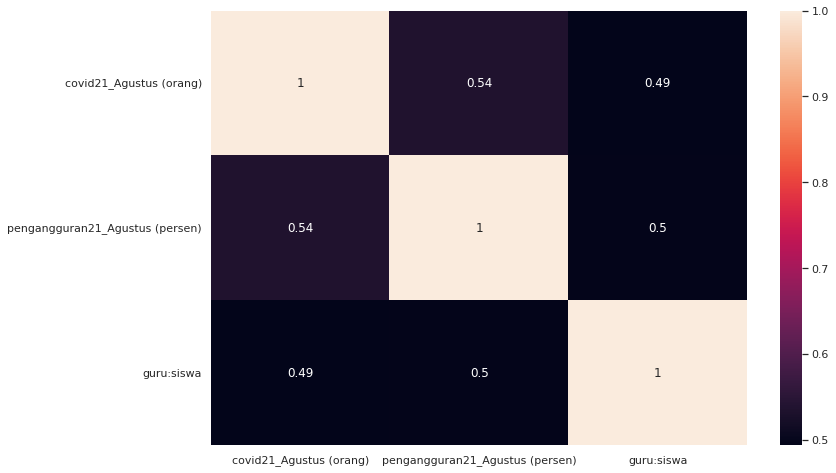

In [ ]:
import seaborn as sns

corr = drop.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns, 
        yticklabels=corr.columns, 
        annot=True)

korelasi independent

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split

df_feature = drop[['covid21_Agustus (orang)']]

df_target = drop[['pengangguran21_Agustus (persen)']]

X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.50, random_state=0)

print(X_train.size, X_test.size)

17 17


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept (a) : {model.intercept_}")
print(f"slope (b) : {model.coef_}")

Intercept (a) : [4.49923858]
slope (b) : [[3.48306836e-05]]


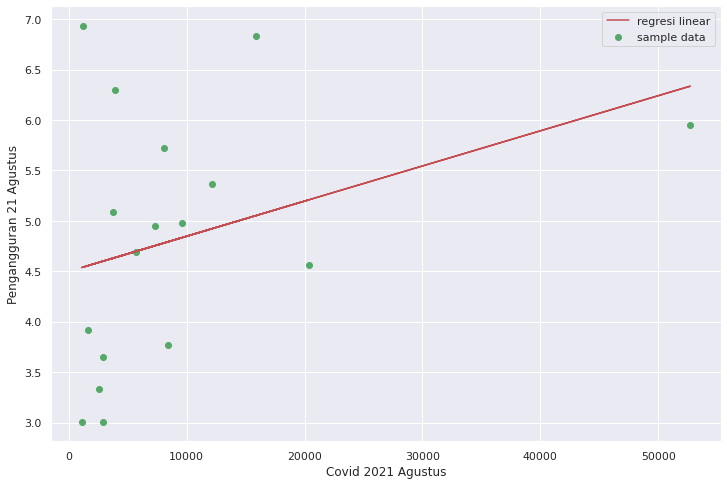

In [ ]:
plt.scatter(X_train, y_train, color='g', edgecolors='g')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel("Covid 2021 Agustus")
plt.ylabel("Pengangguran 21 Agustus")
plt.legend(['regresi linear','sample data'])

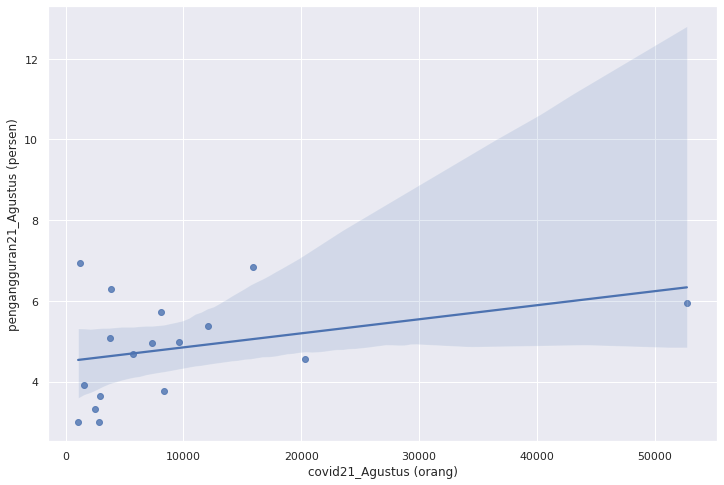

In [ ]:
import seaborn as sns

sns.regplot(x=X_train, y=y_train)

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

print(f'Score : {round(r2_score(y_test, y_pred), 8)}')

Score : 0.02830937


In [ ]:
drop2.iloc[13]

Provinsi                           kalimantan Tengah
covid21_Agustus (orang)                       4918.0
pengangguran21_Agustus (persen)                 4.53
Siswa (orang)                                 505327
Name: 13, dtype: object

In [ ]:
import numpy as np

data_test = np.array([[4918]])  

print(f'prediksinya yaitu {round((model.predict(data_test)[0][0]),2)}%')

prediksinya yaitu 4.67%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# Test 2

In [ ]:
from sklearn.model_selection import train_test_split

df_feature = df[['Siswa (orang)']]

df_target = df[['pengangguran21_Agustus (persen)']]

X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.45, random_state=0)

print(X_train.size, X_test.size)

18 16


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept (a) : {model.intercept_}")
print(f"slope (b) : {model.coef_}")

Intercept (a) : [4.61740609]
slope (b) : [[3.5021134e-07]]


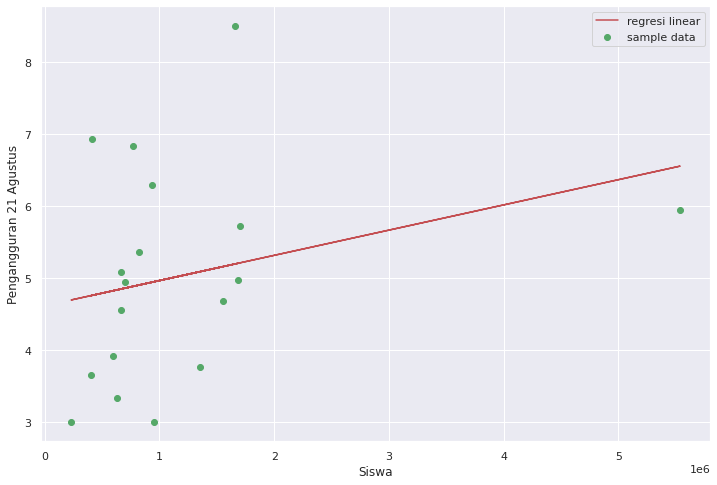

In [ ]:
plt.scatter(X_train, y_train, color='g', edgecolors='g')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel("Siswa")
plt.ylabel("Pengangguran 21 Agustus")
plt.legend(['regresi linear','sample data'])

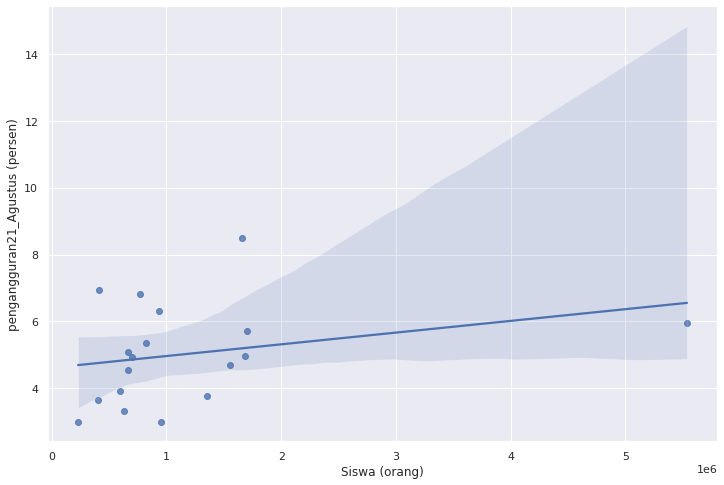

In [ ]:
import seaborn as sns

sns.regplot(x=X_train, y=y_train)

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

print(f'Score : {round(r2_score(y_test, y_pred), 8)}')

Score : 0.05778507


In [ ]:
drop2.iloc[13]

Provinsi                           kalimantan Tengah
covid21_Agustus (orang)                       4918.0
pengangguran21_Agustus (persen)                 4.53
Siswa (orang)                                 505327
Name: 13, dtype: object

In [ ]:
import numpy as np

data_test = np.array([[505327]])  

print(f'prediksinya yaitu {round((model.predict(data_test)[0][0]),2)}%')

prediksinya yaitu 4.79%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# Test 3

In [ ]:
from sklearn.model_selection import train_test_split

df_feature = drop[['guru:siswa']]

df_target = drop[['pengangguran21_Agustus (persen)']]

X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.15, random_state=0)

print(X_train.size, X_test.size)

28 6


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept (a) : {model.intercept_}")
print(f"slope (b) : {model.coef_}")

Intercept (a) : [1.70368771]
slope (b) : [[0.31697918]]


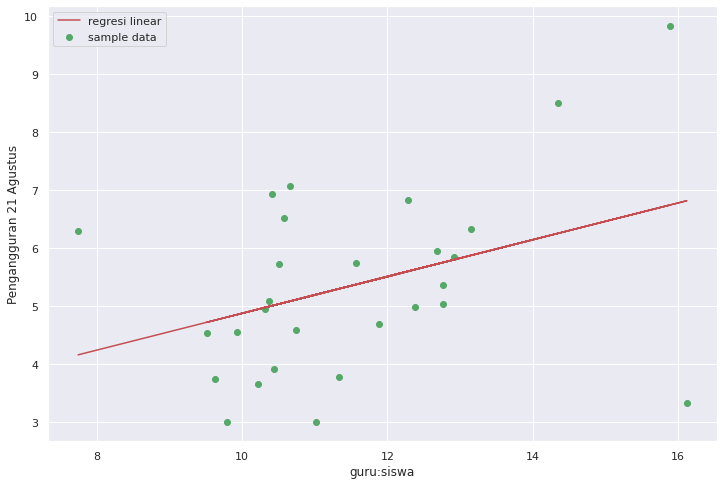

In [ ]:
plt.scatter(X_train, y_train, color='g', edgecolors='g')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel("guru:siswa")
plt.ylabel("Pengangguran 21 Agustus")
plt.legend(['regresi linear','sample data'])

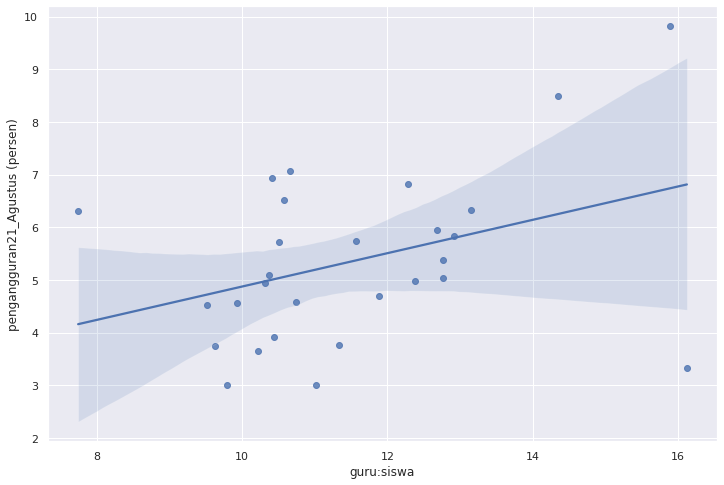

In [ ]:
import seaborn as sns

sns.regplot(x=X_train, y=y_train)

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

print(f'Score : {round(r2_score(y_test, y_pred), 8)}')

Score : 0.30098389


In [ ]:
drop.iloc[13]

Provinsi                           kalimantan Tengah
covid21_Agustus (orang)                       4918.0
pengangguran21_Agustus (persen)                 4.53
guru:siswa                                  9.512933
Name: 13, dtype: object

In [ ]:
import numpy as np

data_test = np.array([[9.51293]])  

print(f'prediksinya yaitu {round((model.predict(data_test)[0][0]),2)}%')

prediksinya yaitu 4.72%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# Test 4

In [ ]:
from sklearn.model_selection import train_test_split

df_feature = df[['covid21_Agustus (orang)', 
                      'Siswa (orang)']]

df_target = df[['pengangguran21_Agustus (persen)']]

X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.50, random_state=0)

print(X_train.size, X_test.size)

34 34


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept (a) : {model.intercept_}")
print(f"slope (b) : {model.coef_}")

Intercept (a) : [4.5504198]
slope (b) : [[ 4.77123184e-05 -1.49539820e-07]]


In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

print(f'Score : {round(r2_score(y_test, y_pred), 8)}')

Score : 0.02066522


In [ ]:
df.iloc[13]

Provinsi                            kalimantan Tengah
covid20_Februari (orang)                          0.0
covid20_Agustus (orang)                         406.0
covid21_Februari (orang)                       1884.0
covid21_Agustus (orang)                        4918.0
pengangguran20_Februari (persen)                 3.33
pengangguran20_Agustus (persen)                  4.58
pengangguran21_Februari (persen)                 4.25
pengangguran21_Agustus (persen)                  4.53
Guru (orang)                                    53120
Siswa (orang)                                  505327
guru:siswa                                   9.512933
Name: 13, dtype: object

In [ ]:
import numpy as np

data_test = np.array([[4918	, 505327]])  

print(f'prediksinya yaitu {round((model.predict(data_test)[0][0]),3)}%')

prediksinya yaitu 4.71%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


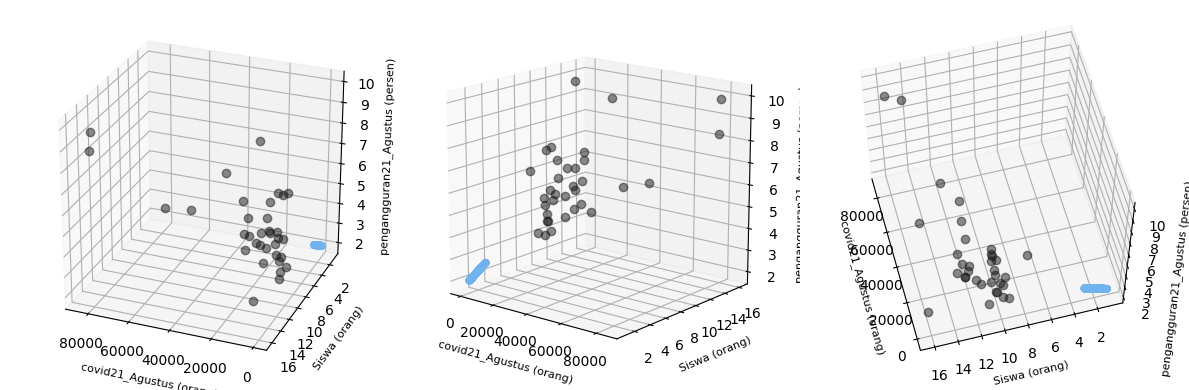

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation ######################################### 

X = df[['covid21_Agustus (orang)', 
                      'guru:siswa']].values.reshape(-1,2)
Y = df['pengangguran21_Agustus (persen)']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('covid21_Agustus (orang)', fontsize=8)
    ax.set_ylabel('Siswa (orang)', fontsize=8)
    ax.set_zlabel('pengangguran21_Agustus (persen)', fontsize=8)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

# fig.suptitle('$R^2 = %.2f$' % r2, fontsize=12)

fig.tight_layout()

In [ ]:
# Min-Max Normalization

df_scale = df.drop("Provinsi", axis = 1) 
df_norm = (df_scale-df_scale.min())/(df_scale.max()-df_scale.min())
df_norm = pd.concat((df_norm, df.Provinsi), 1)
 
# print("Scaled Dataset Using Pandas")
df_norm.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """


covid20_Februari (orang)  covid20_Agustus (orang)  \
0                       NaN                 0.037646   
1                       NaN                 0.125538   
2                       NaN                 0.063460   
3                       NaN                 0.004610   
4                       NaN                 0.032114   

   covid21_Februari (orang)  covid21_Agustus (orang)  \
0                  0.019441                 0.033811   
1                  0.090366                 0.131379   
2                  0.082179                 0.184742   
3                  0.008288                 0.022204   
4                  0.081594                 0.229446   

   pengangguran20_Februari (persen)  pengangguran20_Agustus (persen)  \
0                          0.615727                         0.428571   
1                          0.000000                         0.302752   
2                          1.000000                         0.959371   
3                          0.271513                         0.098296   
4                          0.316024                         0.163827   

   pengangguran21_Februari (persen)  pengangguran21_Agustus (persen)  \
0                          0.441520                         0.476812   
1                          0.312865                         0.342029   
2                          0.837719                         0.865217   
3                          0.064327                         0.092754   
4                          0.146199                         0.224638   

   Guru (orang)  Siswa (orang)  guru:siswa       Provinsi  
0      0.200307       0.091963    0.000000           Aceh  
1      0.094740       0.078795    0.599110           Bali  
2      0.228846       0.234770    0.967376         Banten  
3      0.047910       0.029729    0.295875       Bengkulu  
4      0.100417       0.060965    0.261451  DI Yogyakarta

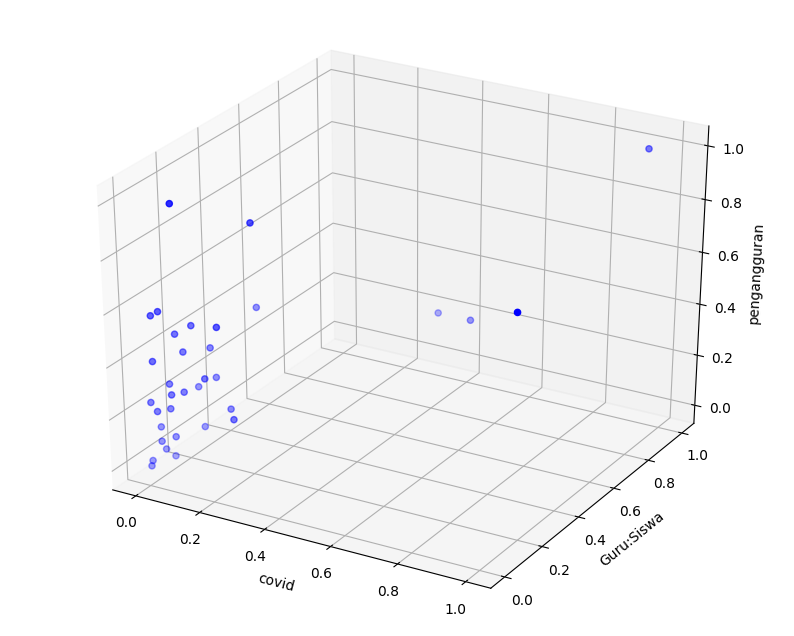

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np 

# dummy variables for demonstration
x = df_norm[['covid21_Agustus (orang)']]
y = df_norm[['Siswa (orang)']] 
z = df_norm['pengangguran21_Agustus (persen)']

# build the figure instance
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='blue', marker='o')

# set your labels
ax.set_xlabel('covid')
ax.set_ylabel('Guru:Siswa')
ax.set_zlabel('pengangguran')

plt.show()

kemungkinan pengauhnya tidak linear positif, telaah signifikansi, apakah pengaruh kecil atau besar, atau koef determinasi ||| uji anova

# COBA COBA Penasaran wkwkwk

In [ ]:
df.head()

Provinsi  covid20_Februari (orang)  covid20_Agustus (orang)  \
0           Aceh                       0.0                    272.0   
1           Bali                       0.0                    844.0   
2         Banten                       0.0                    440.0   
3       Bengkulu                       0.0                     57.0   
4  DI Yogyakarta                       0.0                    236.0   

   covid21_Februari (orang)  covid21_Agustus (orang)  \
0                    1318.0                   3899.0   
1                    4835.0                  12103.0   
2                    4429.0                  16590.0   
3                     765.0                   2923.0   
4                    4400.0                  20349.0   

   pengangguran20_Februari (persen)  pengangguran20_Agustus (persen)  \
0                              5.40                             6.59   
1                              1.25                             5.63   
2                              7.99                            10.64   
3                              3.08                             4.07   
4                              3.38                             4.57   

   pengangguran21_Februari (persen)  pengangguran21_Agustus (persen)  \
0                              6.30                             6.30   
1                              5.42                             5.37   
2                              9.01                             8.98   
3                              3.72                             3.65   
4                              4.28                             4.56   

   Guru (orang)  Siswa (orang)  guru:siswa  
0        120419         932683    7.745314  
1         64291         820544   12.762968  
2        135593        2148778   15.847264  
3         39392         402717   10.223319  
4         67309         668716    9.935016

In [ ]:
df_coba = pd.DataFrame(df['Provinsi'], columns= ['Provinsi'])
df_coba['pengangguran20'] = (df['pengangguran20_Februari (persen)'] + df['pengangguran20_Agustus (persen)'] )/2 
df_coba['pengangguran21'] = (df['pengangguran21_Februari (persen)'] + df['pengangguran21_Agustus (persen)'] )/2 
df_coba['covid20'] = (df['covid20_Februari (orang)'] + df['covid20_Agustus (orang)'] )
df_coba['covid21'] = (df['covid21_Februari (orang)'] + df['covid21_Agustus (orang)'] )/2 

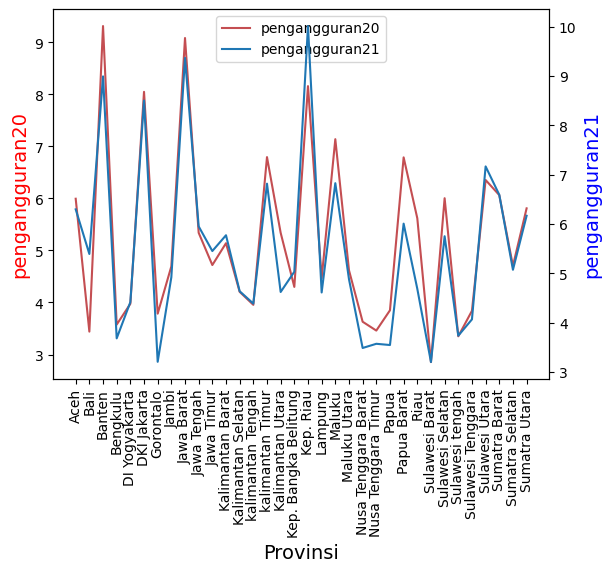

In [ ]:
fig, ax = plt.subplots()
ax.plot([x for x in df["Provinsi"]], [x for x in df_coba['pengangguran20']], "r-", label = 'pengangguran20', linestyle="-")
ax.set_xlabel("Provinsi",fontsize=14,) 
ax.set_ylabel("pengangguran20",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot([x for x in df["Provinsi"]], [y for y in df_coba["pengangguran21"]], label = 'pengangguran21')
ax2.set_ylabel("pengangguran21",color="blue",fontsize=14)
lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center') 
ax.set_xticklabels(df["Provinsi"], rotation = 90) 
plt.show()

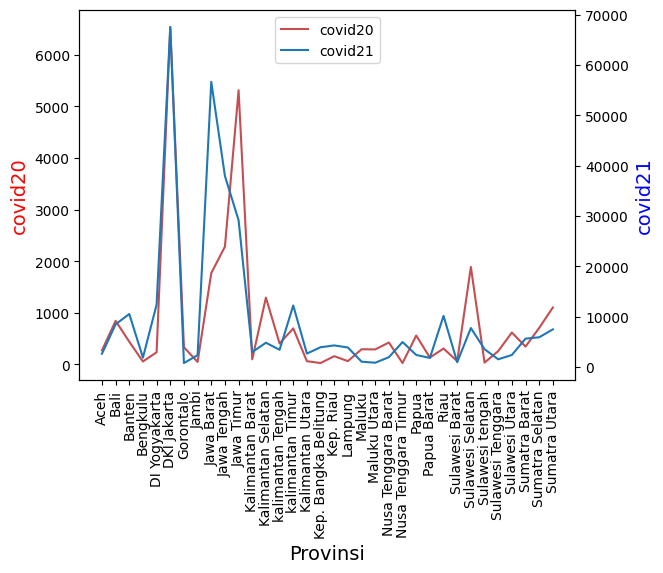

In [ ]:
fig, ax = plt.subplots()
ax.plot([x for x in df["Provinsi"]], [x for x in df_coba['covid20']], "r-", label = 'covid20', linestyle="-")
ax.set_xlabel("Provinsi",fontsize=14,) 
ax.set_ylabel("covid20",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot([x for x in df["Provinsi"]], [y for y in df_coba["covid21"]], label = 'covid21')
ax2.set_ylabel("covid21",color="blue",fontsize=14)
lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center') 
ax.set_xticklabels(df["Provinsi"], rotation = 90) 
plt.show()

In [ ]:
df_coba = pd.DataFrame((df['pengangguran20_Februari (persen)'] + df['pengangguran20_Agustus (persen)'])/2, columns= ['pengangguran20'])
df_coba['pengangguran21'] = (df['pengangguran21_Februari (persen)'] + df['pengangguran21_Agustus (persen)'] )/2 
df_coba['covid20'] = (df['covid20_Februari (orang)'] + df['covid20_Agustus (orang)'] )
df_coba['covid21'] = (df['covid21_Februari (orang)'] + df['covid21_Agustus (orang)'] )/2 
   
covid_2020 = list(x for x in df_coba['covid20'])
covid_2021 = list(x for x in df_coba['covid21'])
pengangguran_2020 = list(x for x in df_coba['pengangguran20'])
pengangguran_2021 = list(x for x in df_coba['pengangguran21'])

In [ ]:
def to_integer(data):
    a = []
    for i in data: 
        a.append(int(i))
    return a

In [ ]:
covid_2020 = to_integer(covid_2020) 
covid_2021 = to_integer(covid_2021) 
pengangguran_2020 = to_integer(pengangguran_2020) 
pengangguran_2021 = to_integer(pengangguran_2021) 

In [ ]:
df_aman = pd.DataFrame(covid_2020, columns= ['covid_2020'])
df_aman['covid21'] = (covid_2021)
df_aman['pengangguran20'] = (pengangguran_2020)
df_aman['pengangguran21'] = (pengangguran_2021)
df_aman.head()

covid_2020  covid21  pengangguran20  pengangguran21
0         272     2608               5               6
1         844     8469               3               5
2         440    10509               9               8
3          57     1844               3               3
4         236    12374               3               4

In [ ]:
df_coba.head()

pengangguran20  pengangguran21  covid20  covid21
0           5.995           6.300    272.0   2608.5
1           3.440           5.395    844.0   8469.0
2           9.315           8.995    440.0  10509.5
3           3.575           3.685     57.0   1844.0
4           3.975           4.420    236.0  12374.5

In [ ]:
peng20 = list(x for x in df_coba['pengangguran20']) 

peng21 = list(x for x in df_coba['pengangguran21']) 

pengangguran20_kenaikan = 0
pengangguran21_kenaikan = 0
for i in peng20:
  pengangguran20_kenaikan += i

for i in peng21:
  pengangguran21_kenaikan += i

pengangguran20_kenaikan = round(pengangguran20_kenaikan / 34,2)
pengangguran21_kenaikan = round(pengangguran21_kenaikan / 34,2)   

In [ ]:
data = {'pengangguran': [5.25,5.5]}
df_data = pd.DataFrame.from_dict(data)
df_data
df_data["ket"] = ['2020','2021']

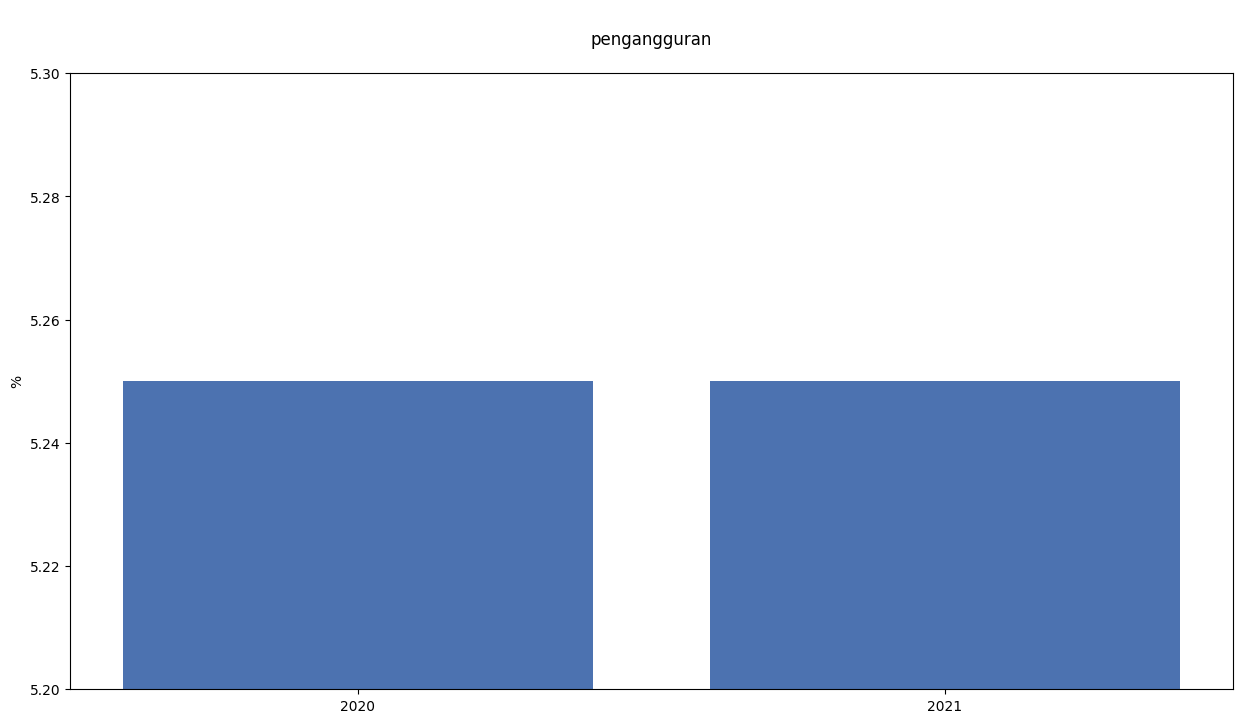

In [ ]:
x_coords = np.arange(len(df_data))

plt.figure(figsize=(15,8))
plt.bar(x_coords, pengangguran20_kenaikan, tick_label=df_data["ket"], color='b') 
plt.ylabel('%')
plt.ylim(5.2,5.3)
plt.title('\npengangguran\n')
plt.show()

# Uji Hipotesis

In [ ]:
coba = df_coba.describe()
coba

pengangguran20  pengangguran21      covid20       covid21
count       34.000000       34.000000    34.000000     34.000000
mean         5.247941        5.498235   823.441176   9595.544118
std          1.686902        1.764643  1417.872610  15446.406263
min          2.855000        3.205000    27.000000    764.500000
25%          3.876250        4.397500   108.250000   2333.875000
50%          4.712500        5.055000   320.500000   3880.750000
75%          6.050000        6.267500   705.500000   8282.250000
max          9.315000       10.015000  6535.000000  67541.000000

In [ ]:
data_2020 = coba['pengangguran20'].unique()
mean2020 = data_2020[1]
std2020 = data_2020[2]

In [ ]:
data_2021 = coba['pengangguran21'].unique()
mean2021 = data_2021[1]
std2021 = data_2021[2]

In [ ]:
D20= coba['covid20'].unique()
M20 = D20[1]
S20 = D20[2] 

In [ ]:
D21 = coba['covid21'].unique()
M21 = D21[1]
S21 = D21[2]

In [ ]:
import math

alpha = 0.05 
zalpha = 1.65
hipotesis = ((mean2020-mean2021)+0.25)/math.sqrt((std2020**2/34)+(std2021**2/34))
hipotesis
if hipotesis > -(zalpha):
    print(f"H0 diterima, dengan Z =", round(hipotesis,2),"\n\nStatistik Uji")
else:
    print(f"H0 ditolak, dengan Z =", round(hipotesis,2),"\n\nStatistik Uji")

H0 diterima, dengan Z = -0.0 

Statistik Uji


In [ ]:
alpha = 0.05
Zalpha = 1.65
# print(M20,M21)
hipotesis2 = ((M20-M21)+8500)/math.sqrt((S20**2/34)+(S21**2/34)) 
if hipotesis >  -(Zalpha):
    print(f"H0 diterima, dengan Z =", round(hipotesis2,2),"\n\nStatistik Uji")
else:
    print(f"H0 ditolak, dengan Z =", round(hipotesis2,2),"\n\nStatistik Uji")

H0 diterima, dengan Z = -0.1 

Statistik Uji


In [ ]:
alpha = 0.05
Zalpha = 1.65
hipotesis2 = ((M21-M20)-8000)/math.sqrt((S21**2/34)+(S20**2/34)) 
if hipotesis >  -(alpha):
    print(f"H0 diterima, dengan U =", round(hipotesis2,2),"\n\nStatistik Uji")
else:
    print(f"H0 ditolak, dengan U =", round(hipotesis2,2),"\n\nStatistik Uji")

H0 diterima, dengan U = 0.29 

Statistik Uji


# COBA

In [ ]:
covid = []
for x in covid_20_Agus:
  covid.append(x)
for x in covid_21_Feb:
  covid.append(x)
for x in covid_21_Agus:
  covid.append(x)

pengangguran = []
for x in pengangguran_20_Agus:
  pengangguran.append(x)
for x in pengangguran_21_Feb:
  pengangguran.append(x)
for x in pengangguran_21_Agus:
  pengangguran.append(x)

gurudansiswa = []
for j in range (3):
  for i in df['guru:siswa']:
    gurudansiswa.append(i)
 

In [ ]:
df_baru = pd.DataFrame(covid, columns= ['covid'])
df_baru['pengangguran'] = pengangguran 
df_baru['guru:siswa'] = gurudansiswa

In [ ]:
from sklearn.model_selection import train_test_split

df_feature = df_baru[['covid']]

df_target = df_baru[['pengangguran']]

X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.35, random_state=0)

print(X_train.size, X_test.size)

66 36


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept (a) : {model.intercept_}")
print(f"slope (b) : {model.coef_}")

Intercept (a) : [5.33934914]
slope (b) : [[4.01240669e-05]]


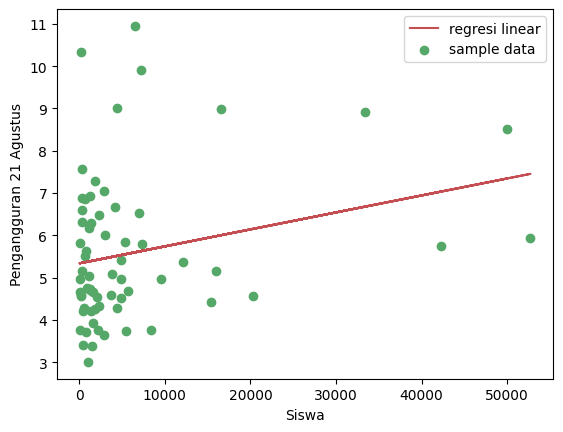

In [ ]:
plt.scatter(X_train, y_train, color='g', edgecolors='g')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel("Siswa")
plt.ylabel("Pengangguran 21 Agustus")
plt.legend(['regresi linear','sample data'])

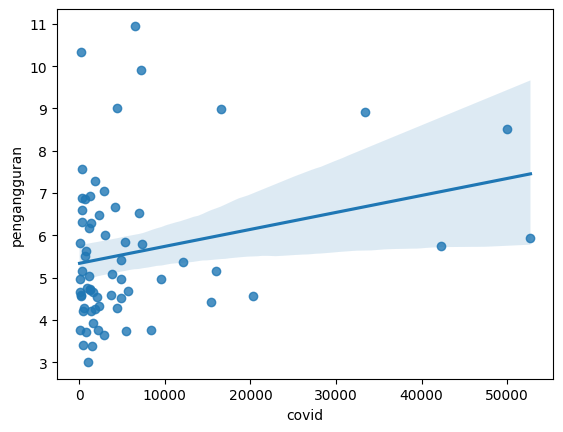

In [ ]:
import seaborn as sns

sns.regplot(x=X_train, y=y_train)

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

print(f'Score : {round(r2_score(y_test, y_pred), 8)}')

Score : 0.15247374


In [ ]:
import numpy as np

data_test = np.array([[1301]])  

print(f'prediksinya yaitu {round((model.predict(data_test)[0][0]),2)}%')

prediksinya yaitu 5.39%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
drop.iloc[20]

Provinsi                           Maluku Utara
covid21_Agustus (orang)                  1301.0
pengangguran21_Agustus (persen)            4.71
guru:siswa                            10.113292
Name: 20, dtype: object

In [ ]:
df_baru.head()

covid  pengangguran  guru:siswa
0  272.0          6.59    7.745314
1  844.0          5.63   12.762968
2  440.0         10.64   15.847264
3   57.0          4.07   10.223319
4  236.0          4.57    9.935016

# Spearmanrank and Kendalltau

In [ ]:
import scipy.stats

alpha = 0.05
stats,p = scipy.stats.spearmanr(df["covid21_Agustus (orang)"], df['Siswa (orang)'])
if p > alpha:
      print(f"nilai stat = {stats:.2f}, p-value = {p:.10f}\n=> fail reject h0, data terdistribusi dengan baik\n\n Spearman Rank Test")
else:
      print(f"nilai stat = {stats:.2f}, p-value = {p:.10f}\n=> tolak h0, data tidak terdistribusi dengan baik\n\n Spearman Rank Test")

nilai stat = 0.78, p-value = 0.0000000607
=> tolak h0, data tidak terdistribusi dengan baik

 Spearman Rank Test


In [ ]:
alpha = 0.05
stats,p = scipy.stats.spearmanr(df_coba["pengangguran21"], df_coba['covid21'])
if p > alpha:
      print(f"nilai stat = {stats:.2f}, p-value = {p:.10f}\n=> fail reject h0, data berdistribusi dengan baik\n\n Spearman Rank Test")
else:
      print(f"nilai stat = {stats:.2f}, p-value = {p:.10f}\n=> tolak h0, data tidak berdistribusi dengan baik\n\n Spearman Rank Test")

nilai stat = 0.46, p-value = 0.0058138950
=> tolak h0, data tidak berdistribusi dengan baik

 Spearman Rank Test


In [ ]:
alpha = 0.05
stats,p = scipy.stats.kendalltau(df["covid21_Agustus (orang)"], df['Siswa (orang)'])
if p > alpha:
      print(f"nilai stat={stats:.2f}, p-value = {p:.10f}\n=> fail reject h0, data terdistribusi dengan baik\n\n Kendalltau Test")
else:
      print(f"nilai stat={stats:.2f}, p-value = {p:.10f}\n=> tolak h0, data tidak terdistribusi dengan baik\n\n Kendalltau Test")

nilai stat=0.58, p-value = 0.0000014505
=> tolak h0, data tidak terdistribusi dengan baik

 Kendalltau Test


# Kruskal Wallis

In [ ]:
from scipy.stats import kruskal
kruskal(df['guru:siswa'], df["covid21_Agustus (orang)"],df["pengangguran21_Agustus (persen)"])
# print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
      print(f"nilai stat={stats:.2f}, p-value = {p:.10f}\n=> fail reject h0, data berdistribusi dari populasi yang sama\n\n Kruskal Wallis")
else:
      print(f"nilai stat={stats:.2f}, p-value = {p:.10f}\n=> tolak h0, data berdistribusi bukan dari populasi yang sama\n\n Kruskal Wallis")

nilai stat=0.58, p-value = 0.0000014505
=> tolak h0, data berdistribusi bukan dari populasi yang sama

 Kruskal Wallis


# T Test

In [ ]:
# stats.ttest_ind(df_aman["covid20"], df["covid21"])
from scipy import stats 

stats.ttest_ind(df_coba["covid20"], df_coba["covid21"])

Ttest_indResult(statistic=-3.2975676633003714, pvalue=0.0015732260037194096)

# ANOVA

In [ ]:
stats.f_oneway(df_coba["covid20"], df_coba["covid21"])

F_onewayResult(statistic=10.873952494044266, pvalue=0.0015732260037194217)

In [ ]:
df_coba.head()

pengangguran20  pengangguran21  covid20  covid21
0           5.995           6.300    272.0   2608.5
1           3.440           5.395    844.0   8469.0
2           9.315           8.995    440.0  10509.5
3           3.575           3.685     57.0   1844.0
4           3.975           4.420    236.0  12374.5

In [ ]:
df_melt = pd.melt(df_coba.reset_index(), id_vars=['index'], value_vars=['covid20', 'covid21'])

In [ ]:
df_melt.columns = ['index', 'treatments', 'value']

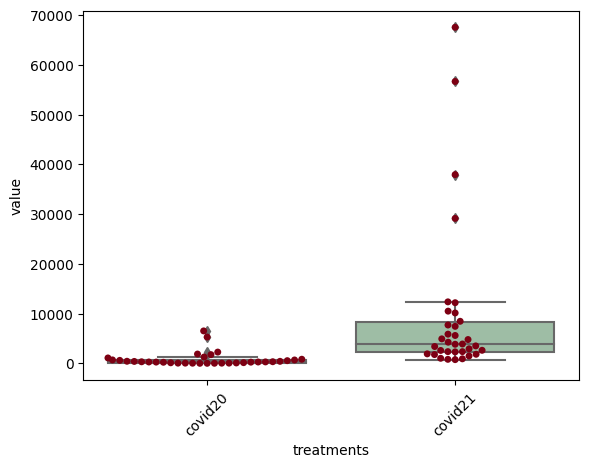

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df_coba['covid20'], df_coba['covid21'])
print(fvalue, pvalue)

10.873952494044266 0.0015732260037194217


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq    df          F    PR(>F)
C(treatments)  1.308146e+09   1.0  10.873952  0.001573
Residual       7.939860e+09  66.0        NaN       NaN

In [ ]:
f_hitung = anova_table['F'].to_list()
f_hitung

[10.873952494044268, nan]

In [ ]:
f_alpha = 2.56 #alpha = 0.05

if f_hitung[0] < f_alpha :
  print("H0 diterima")
else:
  print("H0 ditolak") 

H0 ditolak


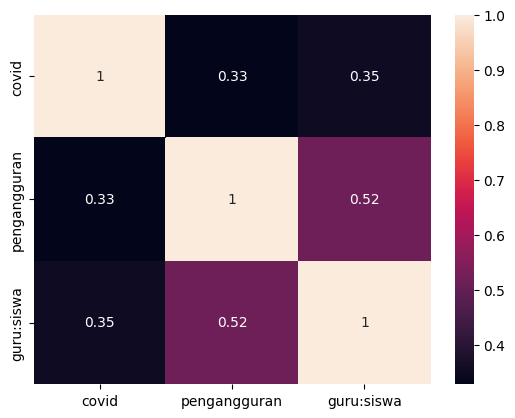

In [ ]:
import seaborn as sns

corr = df_baru.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns, 
        yticklabels=corr.columns, 
        annot=True)

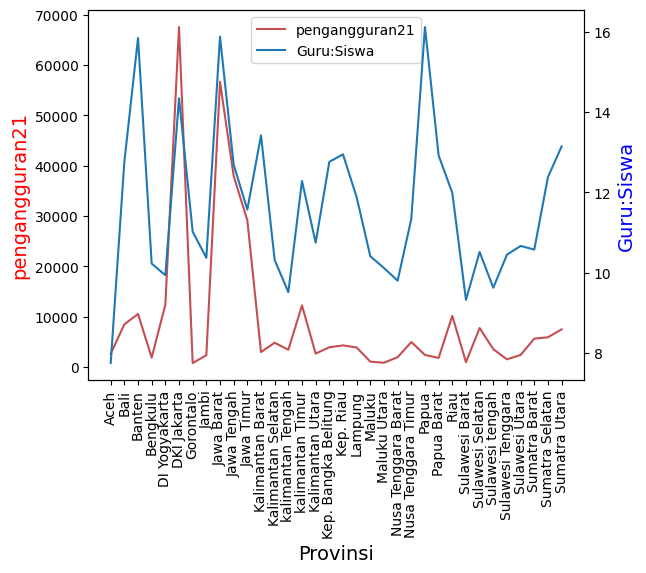

In [ ]:
fig, ax = plt.subplots()
ax.plot([x for x in df["Provinsi"]], [x for x in df_coba["covid21"]], "r-", label = 'pengangguran21', linestyle="-")
ax.set_xlabel("Provinsi",fontsize=14,) 
ax.set_ylabel("pengangguran21",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot([x for x in df["Provinsi"]], [y for y in df["guru:siswa"]], label = 'Guru:Siswa')
ax2.set_ylabel("Guru:Siswa",color="blue",fontsize=14)
lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center')
ax.set_xticklabels(df["Provinsi"], rotation = 90) 
plt.show()

# Boxplot All

In [ ]:
df_Pengangguran = pd.DataFrame(df["Provinsi"] , columns= ['Provinsi'])
df_Pengangguran['pengangguran20_Februari (persen)'] = df['pengangguran20_Februari (persen)']
df_Pengangguran['pengangguran20_Agustus (persen)'] = df['pengangguran20_Agustus (persen)']
df_Pengangguran['pengangguran21_Februari (persen)'] = df['pengangguran21_Februari (persen)']
df_Pengangguran['pengangguran21_Agustus (persen)'] = df['pengangguran21_Agustus (persen)'] 

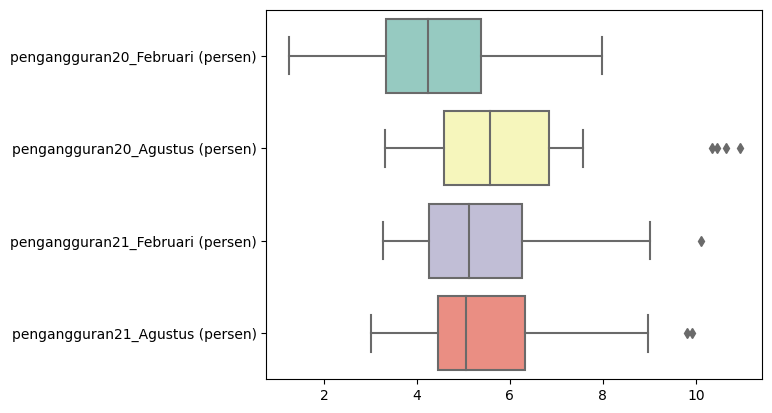

In [ ]:
ax = sns.boxplot(data=df_Pengangguran, orient="h", palette="Set3")

In [ ]:
df_covid = pd.DataFrame(df["Provinsi"] , columns= ['Provinsi'])
df_covid['covid20_Februari (orang)'] = df['covid20_Februari (orang)']
df_covid['covid20_Agustus (orang)'] = df['covid20_Agustus (orang)']
df_covid['covid21_Februari (orang)'] = df['covid21_Februari (orang)']
df_covid['covid21_Agustus (orang)'] = df['covid21_Agustus (orang)'] 

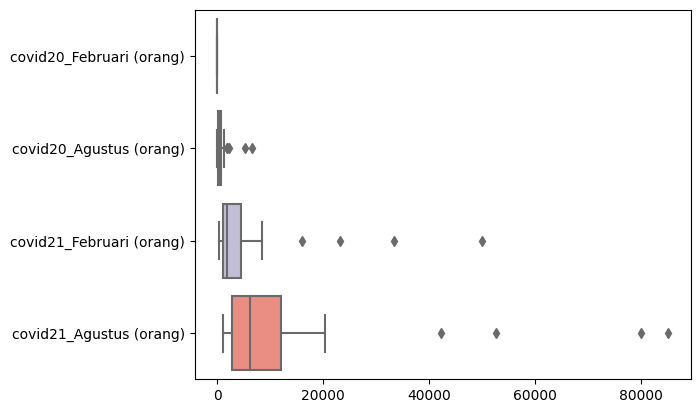

In [ ]:
ax = sns.boxplot(data=df_covid, orient="h", palette="Set3")